In [2]:
#import libraries to help with analysis

import pandas as pd  # data frame operations 
import numpy as np # arrays and math functions
import matplotlib.pyplot as plt #for plotting
from scipy import stats #for statistical analysis
import seaborn as sns #for prettier visualizations
    
get_ipython().magic(u'matplotlib inline') #to show outputs 

#these are some options to control output on your screen 
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 40) #number of columns to print
pd.set_option('display.max_rows', 50) #number of rows to print
pd.set_option('display.width', 120) #width of outputs 

In [3]:
import os 

#Change current working directory
os.chdir('/Users/dalyaadams/desktop')

In [4]:
#import the data file
survey = pd.read_csv('mspa-software-survey-case-python-v004/mspa-survey-data.csv')

In [5]:
# use the RespondentID as label for the rows... the index of DataFrame
survey.set_index('RespondentID', drop = True, inplace = True)

# Data Exploration

In [6]:
#create header 
print('')
print('----- Summary of Input Data -----')
print('')

# show the object is a DataFrame
print('Object type: ', type(survey)) 
print('')

# show number of observations in the DataFrame
print('Number of observations: ', len(survey))
print('')

# show variable names
print('Variable names: ', survey.columns)


----- Summary of Input Data -----

Object type:  <class 'pandas.core.frame.DataFrame'>

Number of observations:  207

Variable names:  Index(['Personal_JavaScalaSpark', 'Personal_JavaScriptHTMLCSS', 'Personal_Python', 'Personal_R', 'Personal_SAS',
       'Professional_JavaScalaSpark', 'Professional_JavaScriptHTMLCSS', 'Professional_Python', 'Professional_R',
       'Professional_SAS', 'Industry_JavaScalaSpark', 'Industry_JavaScriptHTMLCSS', 'Industry_Python', 'Industry_R',
       'Industry_SAS', 'Python_Course_Interest', 'Foundations_DE_Course_Interest', 'Analytics_App_Course_Interest',
       'Systems_Analysis_Course_Interest', 'Courses_Completed', 'PREDICT400', 'PREDICT401', 'PREDICT410', 'PREDICT411',
       'PREDICT413', 'PREDICT420', 'PREDICT422', 'PREDICT450', 'PREDICT451', 'PREDICT452', 'PREDICT453', 'PREDICT454',
       'PREDICT455', 'PREDICT456', 'PREDICT457', 'OtherPython', 'OtherR', 'OtherSAS', 'Other', 'Graduate_Date'],
      dtype='object')


In [7]:
#show variable names, observations for each, data type for each
survey.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207 entries, 5135740122 to 5109806898
Data columns (total 40 columns):
Personal_JavaScalaSpark             207 non-null int64
Personal_JavaScriptHTMLCSS          207 non-null int64
Personal_Python                     207 non-null int64
Personal_R                          207 non-null int64
Personal_SAS                        207 non-null int64
Professional_JavaScalaSpark         207 non-null int64
Professional_JavaScriptHTMLCSS      207 non-null int64
Professional_Python                 207 non-null int64
Professional_R                      207 non-null int64
Professional_SAS                    207 non-null int64
Industry_JavaScalaSpark             207 non-null int64
Industry_JavaScriptHTMLCSS          207 non-null int64
Industry_Python                     207 non-null int64
Industry_R                          207 non-null int64
Industry_SAS                        207 non-null int64
Python_Course_Interest              206 non-null float

In [8]:
#check how many "Other" options there are any the number of times they occur
survey['Other'].value_counts()

Predict 402                                                                       2
PREDICT 402                                                                       2
420,480                                                                           1
Predict 490 Stochastic Simulation & Predict 490 - Managerial Decision Modeling    1
Predict 480, 402                                                                  1
Predict 480                                                                       1
Database Design course in the CIS program (SQL)                                   1
490 - Special Topic -- Data Visualization                                         1
490 - Managerial Decision Modeling                                                1
PREDICT 481 Leadership, PREDICT 402 Intro to Predictive Analytics                 1
Two electives - 490 (MCM and SS) and 490 (MDM).                                   1
Business Leadership                                                         

In [9]:
#check length of Other column
len(survey['Other'])

207

In [10]:
#Values in Graduate Date and number of times they occur
survey['Graduate_Date'].value_counts()

Spring 2018      30
Winter 2018      25
Winter 2017      25
Fall 2018        20
Spring 2017      19
Fall 2017        14
Summer 2017      14
Fall 2016        13
Winter 2019      11
Summer 2018      11
Spring 2019       9
Fall 2019         5
2020 or Later     5
Summer 2019       3
Name: Graduate_Date, dtype: int64

In [11]:
#length of Graduate Date
len(survey['Graduate_Date'])

207

In [12]:
##subset Graduation date:  2017 or before; 
survey['Grad_2017']=np.where((survey.Graduate_Date == 'Fall 2016') 
                           | (survey.Graduate_Date == 'Fall 2017') 
                           | (survey.Graduate_Date == 'Summer 2017')
                           | (survey.Graduate_Date == 'Spring 2017') 
                           | (survey.Graduate_Date == 'Winter 2017'), 1,0)


In [13]:
##subset Graduation date:  2018; 
survey['Grad_2018']=np.where((survey.Graduate_Date == 'Fall 2018') 
                           | (survey.Graduate_Date == 'Summer 2018')
                           | (survey.Graduate_Date == 'Spring 2018') 
                          | (survey.Graduate_Date == 'Winter 2018'),1,0)


In [14]:
##subset Graduation date: 2019 or later
survey['Grad_2019']=np.where((survey.Graduate_Date == 'Fall 2019') 
                           | (survey.Graduate_Date == 'Summer 2019')
                           | (survey.Graduate_Date == 'Spring 2019') 
                           | (survey.Graduate_Date == 'Winter 2019')
                            | (survey.Graduate_Date == '2020 or Later'),1,0)

In [15]:
#For all the Predict categoricals, make them dummy variables,
#Meaning a 1 if they've taken the class, a 0 otherwise
survey=pd.get_dummies(survey, columns=['PREDICT400', 'PREDICT401', 'PREDICT410', 'PREDICT411', 'PREDICT413', 'PREDICT420','PREDICT422', 'PREDICT450', 'PREDICT451','PREDICT452', 'PREDICT453', 'PREDICT454', 'PREDICT455', 'PREDICT456', 'PREDICT457', 'OtherPython', 'OtherR', 'OtherSAS', 'Other'  ] , drop_first=False)

In [16]:
#Check that the dummy variables were created, and also the names
survey.columns

Index(['Personal_JavaScalaSpark', 'Personal_JavaScriptHTMLCSS', 'Personal_Python', 'Personal_R', 'Personal_SAS',
       'Professional_JavaScalaSpark', 'Professional_JavaScriptHTMLCSS', 'Professional_Python', 'Professional_R',
       'Professional_SAS', 'Industry_JavaScalaSpark', 'Industry_JavaScriptHTMLCSS', 'Industry_Python', 'Industry_R',
       'Industry_SAS', 'Python_Course_Interest', 'Foundations_DE_Course_Interest', 'Analytics_App_Course_Interest',
       'Systems_Analysis_Course_Interest', 'Courses_Completed', 'Graduate_Date', 'Grad_2017', 'Grad_2018', 'Grad_2019',
       'PREDICT400_PREDICT 400 Math for Modelers (Python)',
       'PREDICT401_PREDICT 401 Introduction to Statistical Analysis (R)',
       'PREDICT410_PREDICT 410 Regression and Multivariate Analysis (SAS)',
       'PREDICT411_PREDICT 411 Generalized Linear Models (SAS)',
       'PREDICT413_PREDICT 413 Time Series Analysis and Forecasting (R)',
       'PREDICT420_PREDICT 420 Database Systems and Data Preparation (Py

In [17]:
# shorten the variable/column names for software preference variables
survey = survey.rename(index=str, columns={
    'Personal_JavaScalaSpark': 'My_Java',
    'Personal_JavaScriptHTMLCSS': 'My_JS',
    'Personal_Python': 'My_Python',
    'Personal_R': 'My_R',
    'Personal_SAS': 'My_SAS',
    'Professional_JavaScalaSpark': 'Prof_Java',
    'Professional_JavaScriptHTMLCSS': 'Prof_JS',
    'Professional_Python': 'Prof_Python',
    'Professional_R': 'Prof_R',
    'Professional_SAS': 'Prof_SAS',
    'Industry_JavaScalaSpark': 'Ind_Java',
    'Industry_JavaScriptHTMLCSS': 'Ind_JS',
    'Industry_Python': 'Ind_Python',
    'Industry_R': 'Ind_R',
    'Industry_SAS': 'Ind_SAS',
    'PREDICT400_PREDICT 400 Math for Modelers (Python)': 'PREDICT400',
    'PREDICT401_PREDICT 401 Introduction to Statistical Analysis (R)':'PREDICT401',
    'PREDICT410_PREDICT 410 Regression and Multivariate Analysis (SAS)':'PREDICT410',
    'PREDICT411_PREDICT 411 Generalized Linear Models (SAS)':'PREDICT411',
    'PREDICT413_PREDICT 413 Time Series Analysis and Forecasting (R)':'PREDICT413',
    'PREDICT420_PREDICT 420 Database Systems and Data Preparation (Python)':'PREDICT420',
    'PREDICT422_PREDICT 422 Practical Machine Learning (R)':'PREDICT422', 
    'PREDICT450_PREDICT 450 Marketing Analytics (R)':'PREDICT450',
    'PREDICT451_PREDICT 451 Risk Analytics (R)':'PREDICT451',
    'PREDICT452_PREDICT 452 Web Analytics and Network Data Science (Python)':'PREDICT452',
    'PREDICT453_PREDICT 453 Text Analytics (Python)':'PREDICT453', 
    'PREDICT454_PREDICT 454 Advanced Modeling Techniques (R)':'PREDICT454',
    'PREDICT455_PREDICT 455 Data Visualization (R)':'PREDICT455', 
    'PREDICT456_PREDICT 456 Sports Performance Analytics (R)':'PREDICT456',
    'PREDICT457_PREDICT 457 Sports Management Analytics (R)':'PREDICT457',
    'OtherPython_Other Course with Python as the Primary Language':'OtherPython',
    'OtherR_Other Course with R as the Primary Language':'OtherR', 
    'OtherSAS_Other Course with SAS as the Primary Language':'OtherSAS'})


In [18]:
#Take all "other" dummy variables and make one other column

survey['Other'] = survey[['Other_402 - Introduction to Predictive Analytics',
                        'Other_402, 475, 480, 498, CIS 417',
                        'Other_417 ending in June 2014 - terrible course unfortunately!',
                         'Other_420,480',
                         'Other_490 - Managerial Decision Modeling',
                         'Other_490 - Special Topic -- Data Visualization',
                         'Other_498',
                         'Other_599 thesis(SAS with R), 499 independent study (SAS), 417 database systems', 
                        'Other_Business Leadership',
                        'Other_CS-435 with Weka', 
                        'Other_Cis436', 
                        'Other_Database Design course in the CIS program (SQL)',
                        'Other_I am on the old curriculum when 401 was with spss ', 
                        'Other_Intro to predictive analytics',
                        'Other_Introduction to Predictive Analytics',
                       'Other_Other course = 490 simulation and 490 managerial decision modeling', 
                        'Other_PREDICT 402',
                        'Other_PREDICT 402 (I started in Summer 2014)',
                        'Other_PREDICT 481 Leadership, PREDICT 402 Intro to Predictive Analytics', 
                        'Other_Predict 402',
                        'Other_Predict 480', 
                        'Other_Predict 480, 402',
                        'Other_Predict 490 Stochastic Simulation & Predict 490 - Managerial Decision Modeling',
                        'Other_Two electives - 490 (MCM and SS) and 490 (MDM).'
                        ]].sum(axis=1)


In [19]:
#Check to see how many 'other' dummy variables were created
len(survey['Other']==1)

207

In [20]:
#drop all other dummy variable columns added
del survey['Graduate_Date']
del survey['Other_402 - Introduction to Predictive Analytics']
del survey['Other_402, 475, 480, 498, CIS 417']
del survey['Other_417 ending in June 2014 - terrible course unfortunately!']
del survey['Other_420,480']
del survey['Other_490 - Managerial Decision Modeling']
del survey['Other_490 - Special Topic -- Data Visualization']
del survey['Other_498']
del survey['Other_599 thesis(SAS with R), 499 independent study (SAS), 417 database systems'] 
del survey['Other_Business Leadership']
del survey['Other_Cis436']
del survey['Other_Database Design course in the CIS program (SQL)']
del survey['Other_I am on the old curriculum when 401 was with spss '] 
del survey['Other_Intro to predictive analytics']
del survey['Other_Introduction to Predictive Analytics']
del survey['Other_Other course = 490 simulation and 490 managerial decision modeling'] 
del survey['Other_PREDICT 402']
del survey['Other_PREDICT 402 (I started in Summer 2014)']
del survey['Other_PREDICT 481 Leadership, PREDICT 402 Intro to Predictive Analytics']
del survey['Other_Predict 402']
del survey['Other_Predict 480']
del survey['Other_Predict 480, 402']
del survey['Other_Two electives - 490 (MCM and SS) and 490 (MDM).']
del survey['Other_CS-435 with Weka']
del survey['Other_Predict 490 Stochastic Simulation & Predict 490 - Managerial Decision Modeling']
                        

In [21]:
#check columns after deleting to confirm deletion
survey.columns

Index(['My_Java', 'My_JS', 'My_Python', 'My_R', 'My_SAS', 'Prof_Java', 'Prof_JS', 'Prof_Python', 'Prof_R', 'Prof_SAS',
       'Ind_Java', 'Ind_JS', 'Ind_Python', 'Ind_R', 'Ind_SAS', 'Python_Course_Interest',
       'Foundations_DE_Course_Interest', 'Analytics_App_Course_Interest', 'Systems_Analysis_Course_Interest',
       'Courses_Completed', 'Grad_2017', 'Grad_2018', 'Grad_2019', 'PREDICT400', 'PREDICT401', 'PREDICT410',
       'PREDICT411', 'PREDICT413', 'PREDICT420', 'PREDICT422', 'PREDICT450', 'PREDICT451', 'PREDICT452', 'PREDICT453',
       'PREDICT454', 'PREDICT455', 'PREDICT456', 'PREDICT457', 'OtherPython', 'OtherR', 'OtherSAS', 'Other'],
      dtype='object')

In [22]:
# show descriptive statistics for all
survey.describe()

          My_Java       My_JS   My_Python        My_R      My_SAS   Prof_Java     Prof_JS  Prof_Python      Prof_R  \
count  207.000000  207.000000  207.000000  207.000000  207.000000  207.000000  207.000000   207.000000  207.000000   
mean    10.135266    4.797101   31.304348   37.125604   16.637681    9.251208    5.840580    30.028986   36.415459   
std     11.383477    6.757764   15.570982   14.576003   13.626400   13.167505   10.812555    19.144802   20.847606   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000     0.000000    0.000000   
25%      0.000000    0.000000   20.000000   30.000000    5.000000    0.000000    0.000000    20.000000   25.000000   
50%      9.000000    0.000000   30.000000   35.000000   15.000000    5.000000    0.000000    30.000000   33.000000   
75%     20.000000   10.000000   40.000000   50.000000   25.000000   15.000000   10.000000    40.000000   50.000000   
max     70.000000   30.000000   90.000000  100.000000   

In [23]:
## now just show descriptive stats for personal language preferences
survey.loc[:, 'My_Java':'My_SAS'].describe()

          My_Java       My_JS   My_Python        My_R      My_SAS
count  207.000000  207.000000  207.000000  207.000000  207.000000
mean    10.135266    4.797101   31.304348   37.125604   16.637681
std     11.383477    6.757764   15.570982   14.576003   13.626400
min      0.000000    0.000000    0.000000    0.000000    0.000000
25%      0.000000    0.000000   20.000000   30.000000    5.000000
50%      9.000000    0.000000   30.000000   35.000000   15.000000
75%     20.000000   10.000000   40.000000   50.000000   25.000000
max     70.000000   30.000000   90.000000  100.000000   75.000000

In [24]:
## now just show descriptive stats for Professional language preferences
survey.loc[:, 'Prof_Java':'Prof_SAS'].describe()

        Prof_Java     Prof_JS  Prof_Python      Prof_R    Prof_SAS
count  207.000000  207.000000   207.000000  207.000000  207.000000
mean     9.251208    5.840580    30.028986   36.415459   18.463768
std     13.167505   10.812555    19.144802   20.847606   18.831841
min      0.000000    0.000000     0.000000    0.000000    0.000000
25%      0.000000    0.000000    20.000000   25.000000    0.000000
50%      5.000000    0.000000    30.000000   33.000000   15.000000
75%     15.000000   10.000000    40.000000   50.000000   30.000000
max     80.000000  100.000000   100.000000  100.000000  100.000000

In [25]:
## now just show descriptive stats for Insdustry language preferences
survey.loc[:, 'Ind_Java':'Ind_SAS'].describe()

         Ind_Java      Ind_JS  Ind_Python       Ind_R     Ind_SAS
count  207.000000  207.000000  207.000000  207.000000  207.000000
mean    11.942029    6.966184   29.772947   32.434783   18.884058
std     14.706399   10.030721   17.959816   15.912209   19.137623
min      0.000000    0.000000    0.000000    0.000000    0.000000
25%      0.000000    0.000000   20.000000   22.500000    0.000000
50%      5.000000    0.000000   30.000000   30.000000   15.000000
75%     20.000000   10.000000   40.000000   40.000000   30.000000
max     70.000000   50.000000   95.000000   85.000000  100.000000

In [113]:
#create subsetted dataframe for graduation dates: 2017 and before, 2018, 2019 and later
g_2017=survey.loc[survey['Grad_2017']==1]
g_2018=survey.loc[survey['Grad_2018']==1]
g_2019=survey.loc[survey['Grad_2019']==1]

In [114]:
## show descriptive stats for personal preferences for those graduating in 2017 or before
g_2017.loc[:, 'My_Java':'My_SAS'].describe()

         My_Java      My_JS  My_Python        My_R     My_SAS
count  85.000000  85.000000  85.000000   85.000000  85.000000
mean   11.200000   4.047059  32.341176   37.035294  15.376471
std    12.820928   5.591034  16.725766   16.534558  12.607610
min     0.000000   0.000000   0.000000    0.000000   0.000000
25%     0.000000   0.000000  20.000000   30.000000   5.000000
50%    10.000000   0.000000  30.000000   32.000000  15.000000
75%    20.000000  10.000000  40.000000   50.000000  25.000000
max    70.000000  20.000000  90.000000  100.000000  50.000000

In [115]:
## show descriptive stats for personal preferences for those graduating in 2018


g_2018.loc[:, 'My_Java':'My_SAS'].describe()

         My_Java      My_JS  My_Python       My_R     My_SAS
count  86.000000  86.000000  86.000000  86.000000  86.000000
mean    8.697674   5.162791  29.709302  37.616279  18.813953
std     9.498074   6.933059  15.361423  13.247125  14.966246
min     0.000000   0.000000   0.000000  15.000000   0.000000
25%     0.000000   0.000000  20.000000  30.000000  10.000000
50%     5.000000   0.000000  30.000000  40.000000  20.000000
75%    15.000000  10.000000  40.000000  40.000000  29.250000
max    40.000000  25.000000  80.000000  75.000000  75.000000

In [116]:
## show descriptive stats for personal preferences for those graduating in 2019 or after


g_2019.loc[:, 'My_Java':'My_SAS'].describe()

         My_Java      My_JS  My_Python       My_R     My_SAS
count  33.000000  33.000000  33.000000  33.000000  33.000000
mean   12.060606   6.212121  32.606061  36.424242  12.696970
std    11.876814   8.841513  11.651018  12.976012  10.534126
min     0.000000   0.000000  10.000000  10.000000   0.000000
25%     0.000000   0.000000  25.000000  30.000000   0.000000
50%    10.000000   0.000000  30.000000  33.000000  10.000000
75%    20.000000  10.000000  40.000000  50.000000  20.000000
max    35.000000  30.000000  50.000000  70.000000  40.000000

In [117]:
## show descriptive stats for Professional preferences for those graduating in 2017 or before


g_2017.loc[:, 'Prof_Java':'Prof_SAS'].describe()

       Prof_Java     Prof_JS  Prof_Python      Prof_R   Prof_SAS
count  85.000000   85.000000    85.000000   85.000000  85.000000
mean    9.705882    5.764706    30.917647   36.470588  17.141176
std    13.525834   12.162244    21.245286   21.883125  17.556136
min     0.000000    0.000000     0.000000    0.000000   0.000000
25%     0.000000    0.000000    20.000000   25.000000   0.000000
50%     5.000000    0.000000    30.000000   30.000000  10.000000
75%    15.000000   10.000000    45.000000   50.000000  30.000000
max    80.000000  100.000000   100.000000  100.000000  80.000000

In [118]:
## show descriptive stats for Professional preferences for those graduating in 2018


g_2018.loc[:, 'Prof_Java':'Prof_SAS'].describe()

       Prof_Java    Prof_JS  Prof_Python      Prof_R    Prof_SAS
count  86.000000  86.000000    86.000000   86.000000   86.000000
mean    7.500000   6.232558    28.848837   36.988372   20.430233
std    10.196597   9.783148    17.848722   20.260941   20.204566
min     0.000000   0.000000     0.000000    0.000000    0.000000
25%     0.000000   0.000000    20.000000   25.000000    5.000000
50%     2.500000   0.000000    30.000000   34.000000   20.000000
75%    10.000000  10.000000    40.000000   48.750000   30.000000
max    50.000000  50.000000    80.000000  100.000000  100.000000

In [119]:
## show descriptive stats for Professional preferences for those graduating in 2019 or after


g_2019.loc[:, 'Prof_Java':'Prof_SAS'].describe()

       Prof_Java    Prof_JS  Prof_Python      Prof_R   Prof_SAS
count  33.000000  33.000000    33.000000   33.000000  33.000000
mean   13.484848   5.545455    30.515152   36.727273  13.727273
std    18.012359  10.314101    16.409070   20.044127  14.917005
min     0.000000   0.000000     0.000000    0.000000   0.000000
25%     0.000000   0.000000    20.000000   25.000000   0.000000
50%     5.000000   0.000000    30.000000   40.000000  10.000000
75%    20.000000   5.000000    40.000000   50.000000  20.000000
max    70.000000  50.000000    60.000000  100.000000  50.000000

In [120]:
## show descriptive stats for Industry preferences for those graduating in 2017 or before


g_2017.loc[:, 'Ind_Java':'Ind_SAS'].describe()

        Ind_Java     Ind_JS  Ind_Python      Ind_R    Ind_SAS
count  85.000000  85.000000   85.000000  85.000000  85.000000
mean   12.235294   5.235294   31.270588  32.435294  18.823529
std    14.910564   7.672845   19.187911  16.823628  19.065162
min     0.000000   0.000000    0.000000   0.000000   0.000000
25%     0.000000   0.000000   20.000000  20.000000   0.000000
50%    10.000000   0.000000   30.000000  30.000000  15.000000
75%    20.000000  10.000000   40.000000  40.000000  30.000000
max    60.000000  30.000000   95.000000  80.000000  80.000000

In [121]:
## show descriptive stats for Industry preferences for those graduating in 2018


g_2018.loc[:, 'Ind_Java':'Ind_SAS'].describe()

        Ind_Java     Ind_JS  Ind_Python      Ind_R     Ind_SAS
count  86.000000  86.000000    86.00000  86.000000   86.000000
mean   10.976744   8.511628    28.22093  32.476744   19.813953
std    13.371591  11.189012    17.24795  15.325278   20.758279
min     0.000000   0.000000     0.00000   0.000000    0.000000
25%     0.000000   0.000000    20.00000  25.000000    5.000000
50%     5.000000   3.000000    30.00000  30.000000   15.000000
75%    20.000000  20.000000    40.00000  40.000000   25.750000
max    60.000000  50.000000    80.00000  85.000000  100.000000

In [122]:
## show descriptive stats for Industry preferences for those graduating in 2019


g_2019.loc[:, 'Ind_Java':'Ind_SAS'].describe()

        Ind_Java     Ind_JS  Ind_Python      Ind_R    Ind_SAS
count  33.000000  33.000000   33.000000  33.000000  33.000000
mean   14.787879   8.030303   29.030303  32.242424  15.909091
std    17.586852  11.854548   14.898584  15.811448  14.708339
min     0.000000   0.000000    0.000000   0.000000   0.000000
25%     0.000000   0.000000   20.000000  20.000000   0.000000
50%    10.000000   5.000000   30.000000  30.000000  20.000000
75%    25.000000  10.000000   40.000000  50.000000  20.000000
max    70.000000  50.000000   60.000000  60.000000  50.000000

In [26]:
## now just show descriptive stats for new course preferences

survey.loc[:, 'Python_Course_Interest':'Systems_Analysis_Course_Interest'].describe()

       Python_Course_Interest  Foundations_DE_Course_Interest  Analytics_App_Course_Interest  \
count              206.000000                      200.000000                     203.000000   
mean                73.529126                       58.045000                      55.201970   
std                 29.835429                       32.588079                      34.147954   
min                  0.000000                        0.000000                       0.000000   
25%                 53.000000                       29.500000                      25.000000   
50%                 82.500000                       60.000000                      60.000000   
75%                100.000000                       89.250000                      85.000000   
max                100.000000                      100.000000                     100.000000   

       Systems_Analysis_Course_Interest  
count                        200.000000  
mean                          53.630000  
std      

In [27]:
# How many Null values?
len(survey.index)-survey.count()

My_Java                              0
My_JS                                0
My_Python                            0
My_R                                 0
My_SAS                               0
Prof_Java                            0
Prof_JS                              0
Prof_Python                          0
Prof_R                               0
Prof_SAS                             0
Ind_Java                             0
Ind_JS                               0
Ind_Python                           0
Ind_R                                0
Ind_SAS                              0
Python_Course_Interest               1
Foundations_DE_Course_Interest       7
Analytics_App_Course_Interest        4
Systems_Analysis_Course_Interest     7
Courses_Completed                   20
Grad_2017                            0
Grad_2018                            0
Grad_2019                            0
PREDICT400                           0
PREDICT401                           0
PREDICT410               

In [28]:
#install pandas profiling
!pip install pandas-profiling
import pandas_profiling

/Applications/anaconda3/lib/python3.6/site-packages/pandas_profiling/plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/Applications/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Applications/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Applications/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Applications/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 486, 

In [29]:
#create a profile report and view it
profile=pandas_profiling.ProfileReport(survey)
profile

In [30]:
#get rejected variables, or those with collinear relaitonship with other variabes
#threshold of .9 means .90 correlation between explanatory variables

rejected_variables = profile.get_rejected_variables(threshold=0.9) 
rejected_variables #no rejected variables

[]

In [91]:
#export profile to html file for viewing in browser
profile.to_file(outputfile="Pandas_Profile.html")

# Data Visualization

In [31]:
# Survey_df for scatter plots of personal preferences
survey_df = survey.rename(index=str, columns={
    'Personal_JavaScalaSpark': 'My_Java',
    'Personal_JavaScriptHTMLCSS': 'My_JS',
    'Personal_Python': 'My_Python',
    'Personal_R': 'My_R',
    'Personal_SAS': 'My_SAS',
    'Professional_JavaScalaSpark': 'Prof_Java',
    'Professional_JavaScriptHTMLCSS': 'Prof_JS',
    'Professional_Python': 'Prof_Python',
    'Professional_R': 'Prof_R',
    'Professional_SAS': 'Prof_SAS',
    'Industry_JavaScalaSpark': 'Ind_Java',
    'Industry_JavaScriptHTMLCSS': 'Ind_JS',
    'Industry_Python': 'Ind_Python',
    'Industry_R': 'Ind_R',
    'Industry_SAS': 'Ind_SAS'})

#rename labels for visualizaitons
survey_df_labels = [
    'Personal Preference for Java/Scala/Spark',
    'Personal Preference for Java/Script/HTML/CSS',
    'Personal Preference for Python',
    'Personal Preference for R',
    'Personal Preference for SAS',
    'Professional Java/Scala/Spark',
    'Professional JavaScript/HTML/CSS',
    'Professional Python',
    'Professional R',
    'Professional SAS',
    'Industry Java/Scala/Spark',
    'Industry Java/Script/HTML/CSS',
    'Industry Python',
    'Industry R',
    'Industry SAS'        
]  

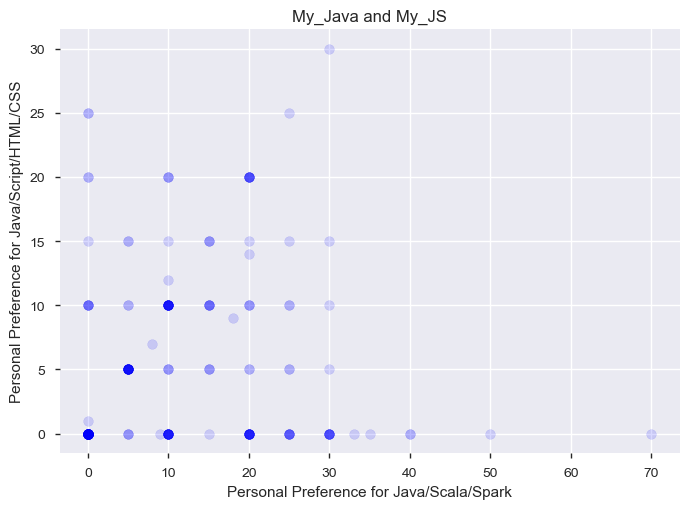

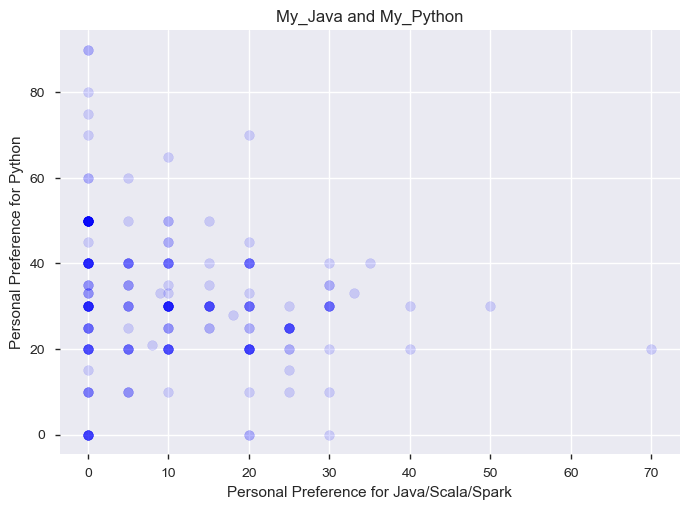

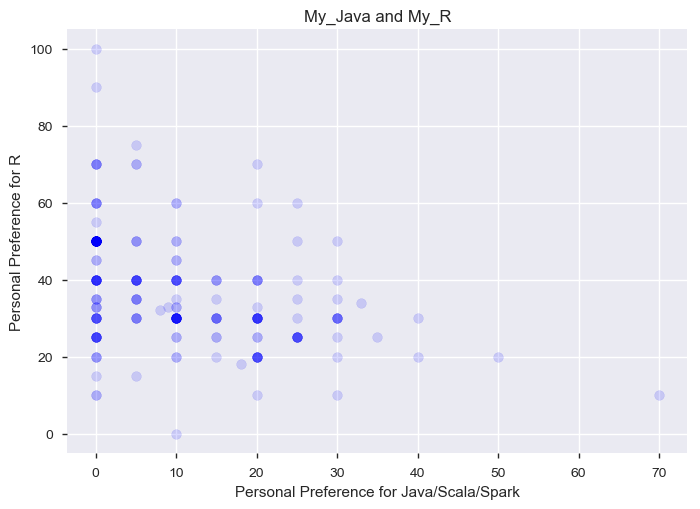

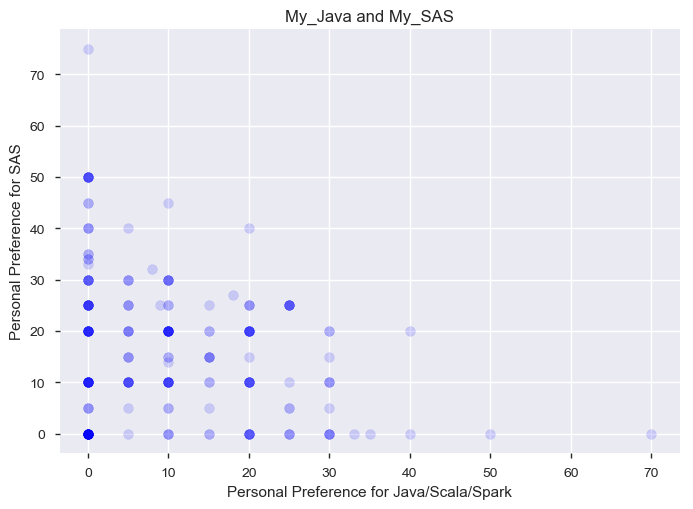

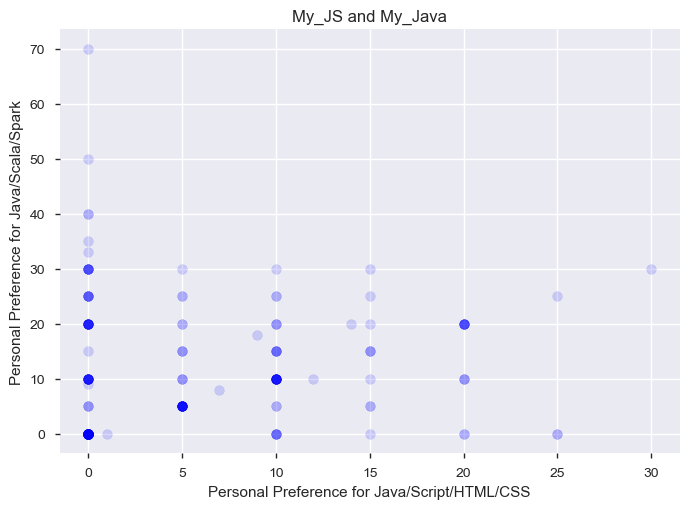

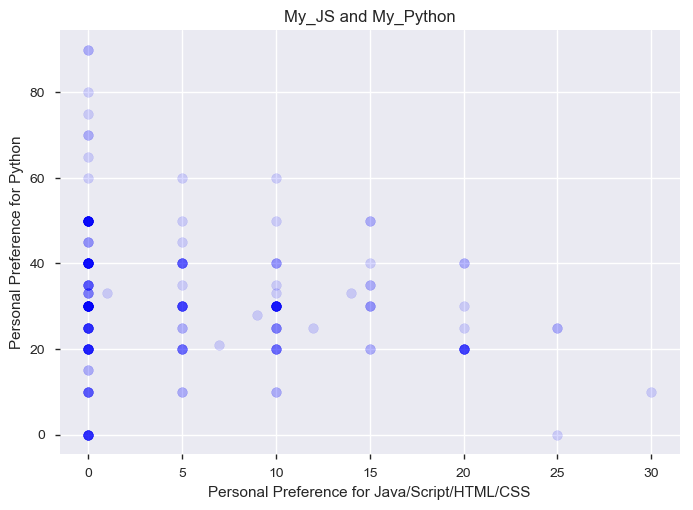

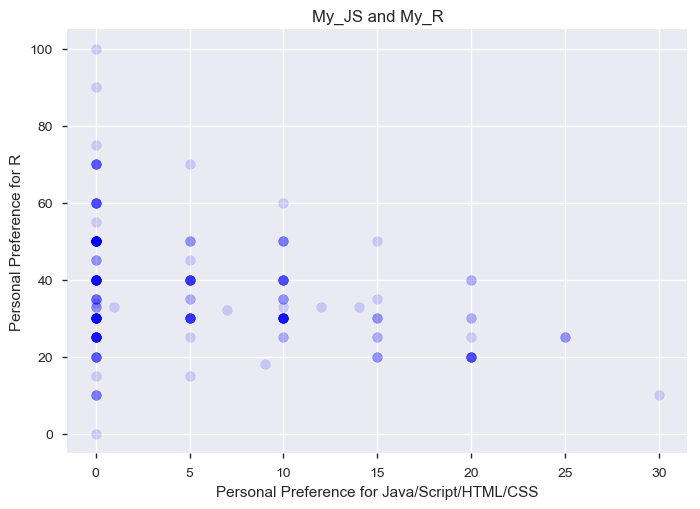

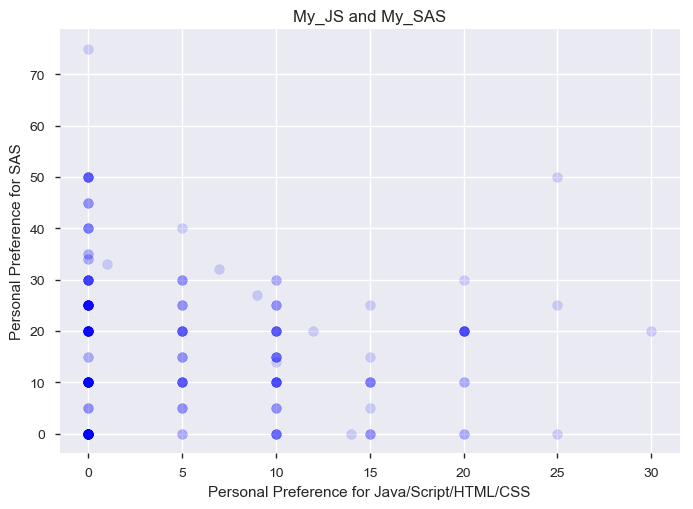

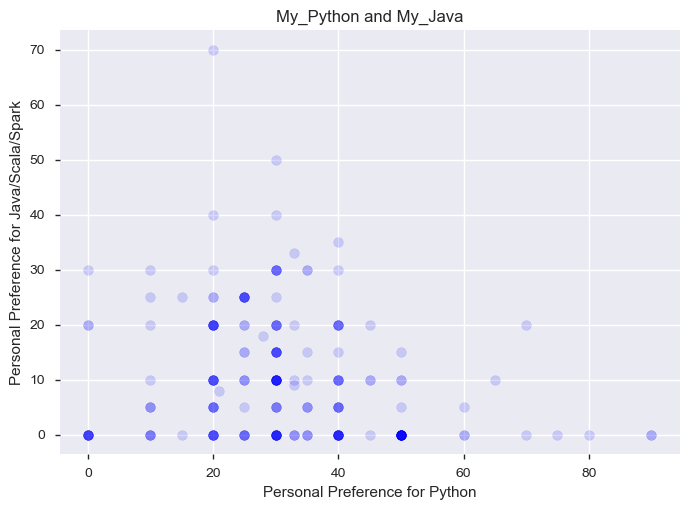

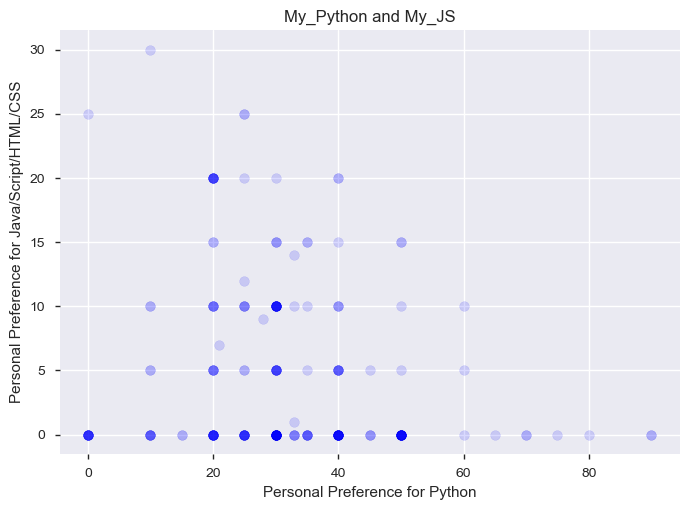

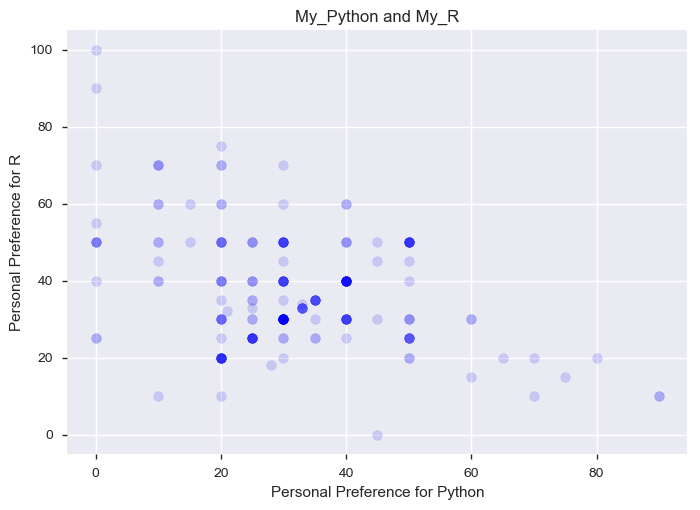

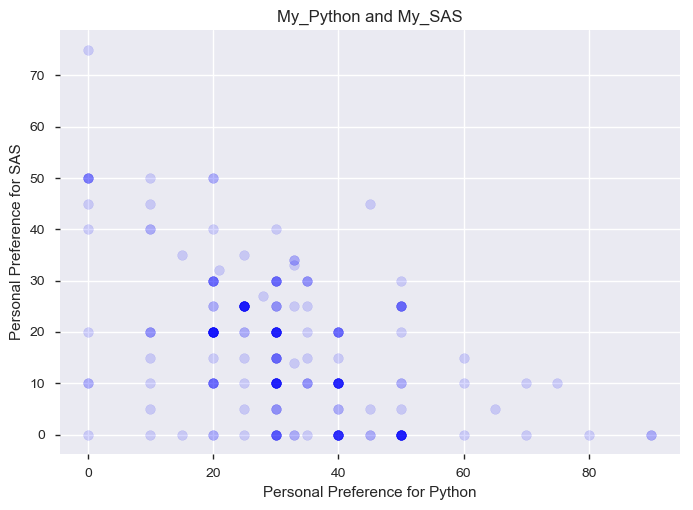

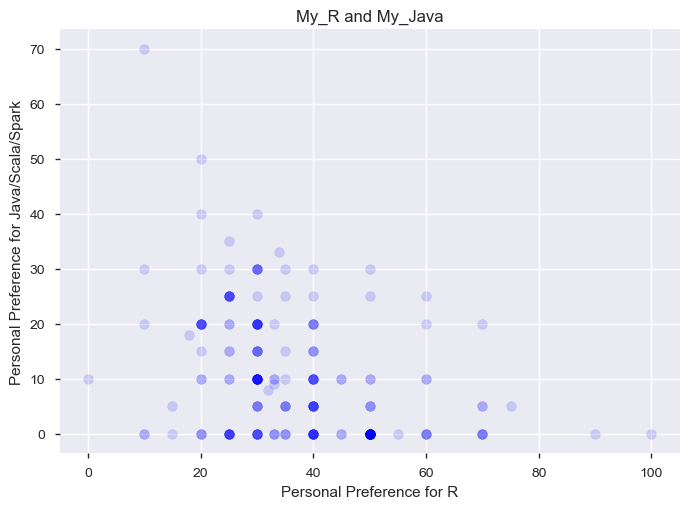

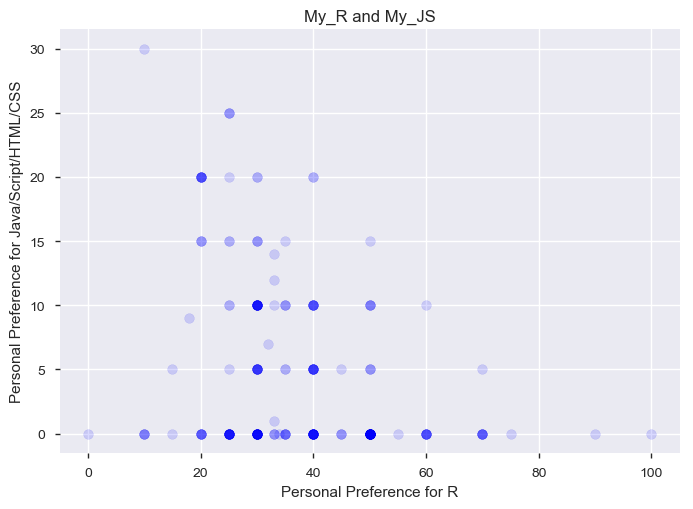

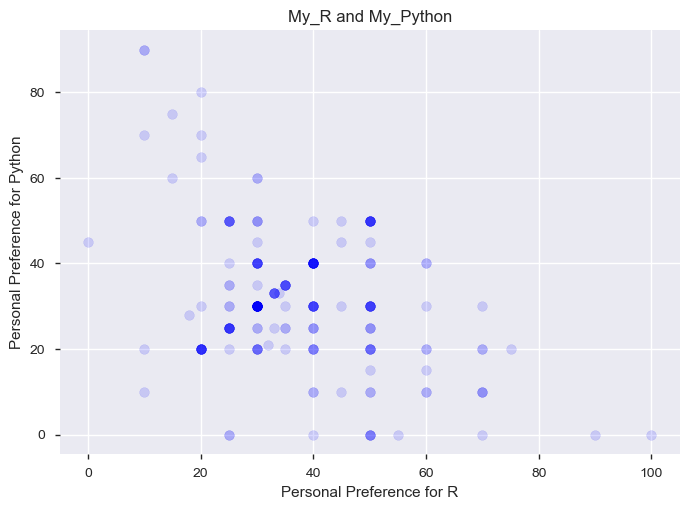

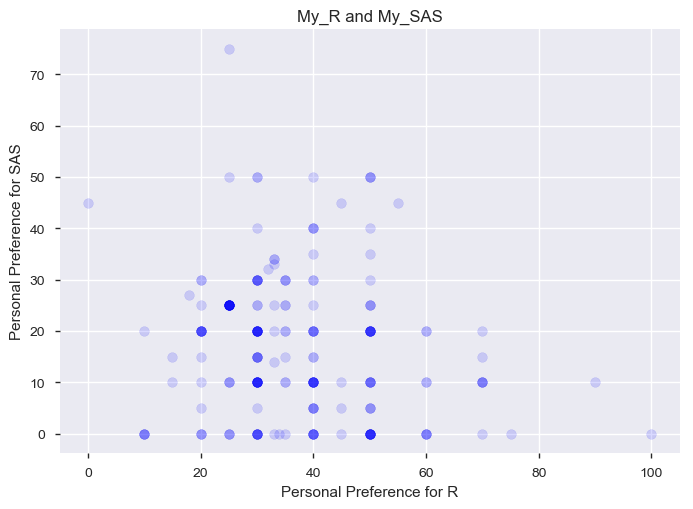

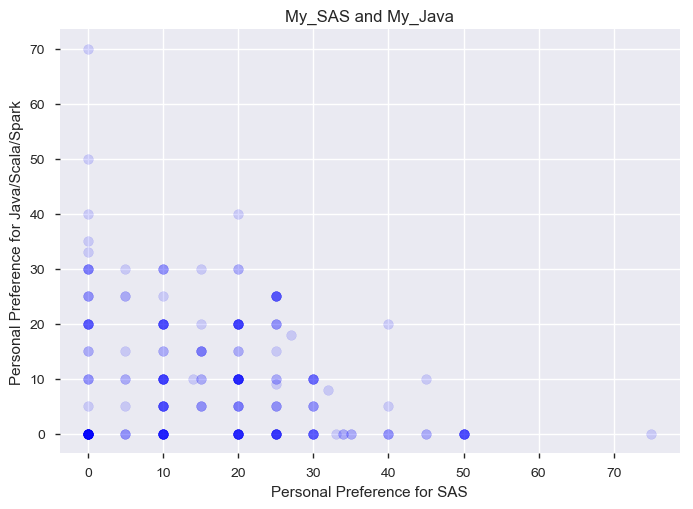

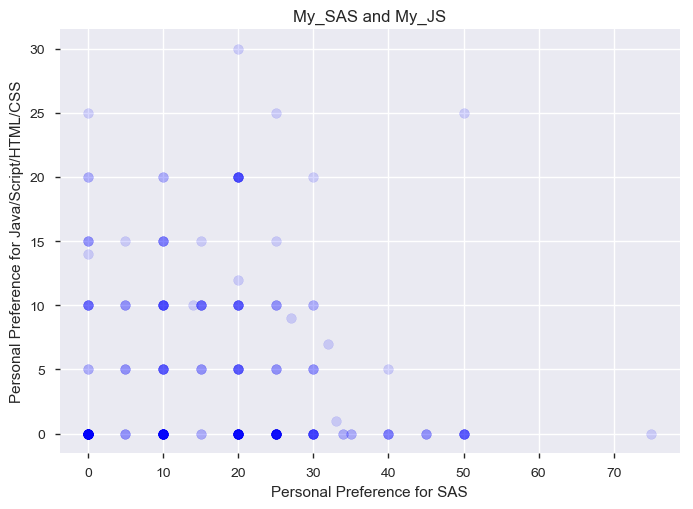

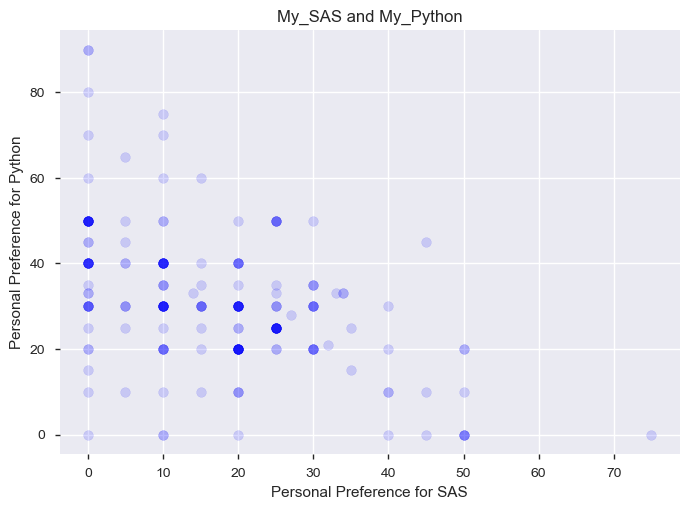

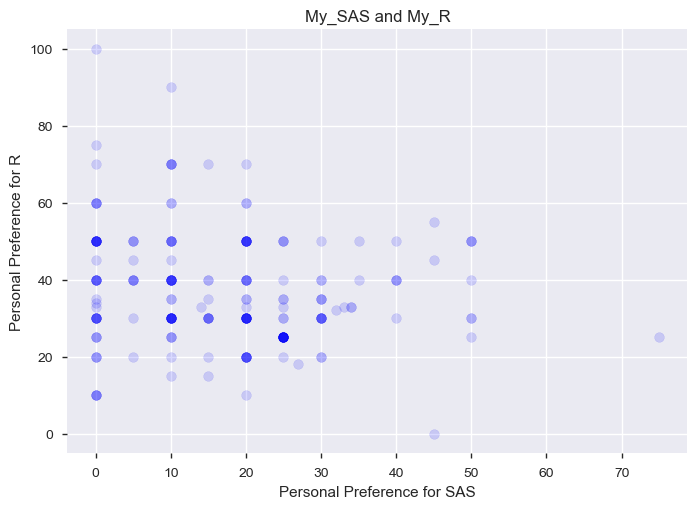

In [32]:
# create a set of scatter plots for personal preferences
for i in range(5):
    for j in range(5):
        if i != j:
            file_title = survey_df.columns[i] + '_and_' + survey_df.columns[j]
            plot_title = survey_df.columns[i] + ' and ' + survey_df.columns[j]
            fig, axis = plt.subplots()
            axis.set_xlabel(survey_df_labels[i])
            axis.set_ylabel(survey_df_labels[j])
            plt.title(plot_title)
            scatter_plot = axis.scatter(survey_df[survey_df.columns[i]], 
            survey_df[survey_df.columns[j]],
            facecolors = 'blue', 
            edgecolors = 'blue',
            alpha=0.15)  
            plt.savefig(file_title + '.pdf', 
                bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
                orientation='portrait', papertype=None, format=None, 
                transparent=True, pad_inches=0.25, frameon=None)  



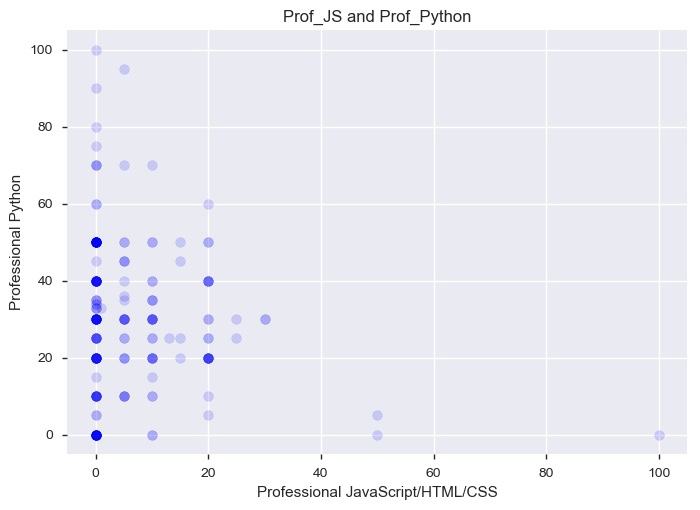

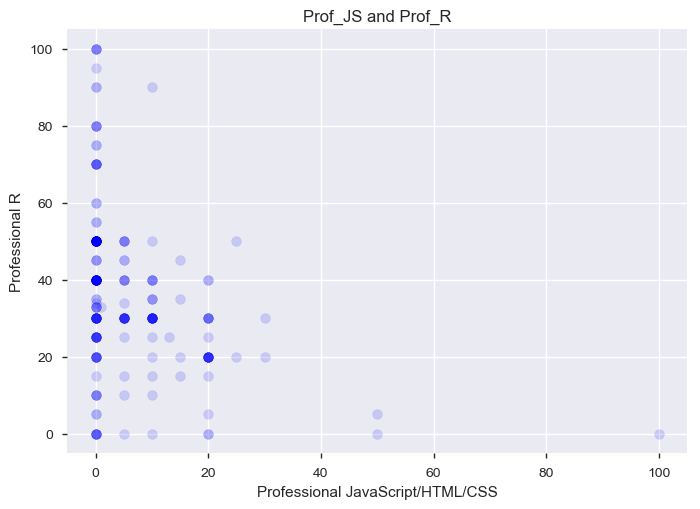

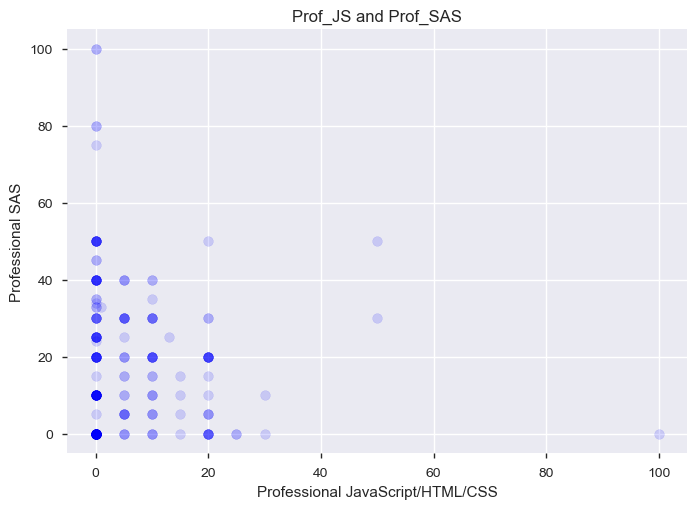

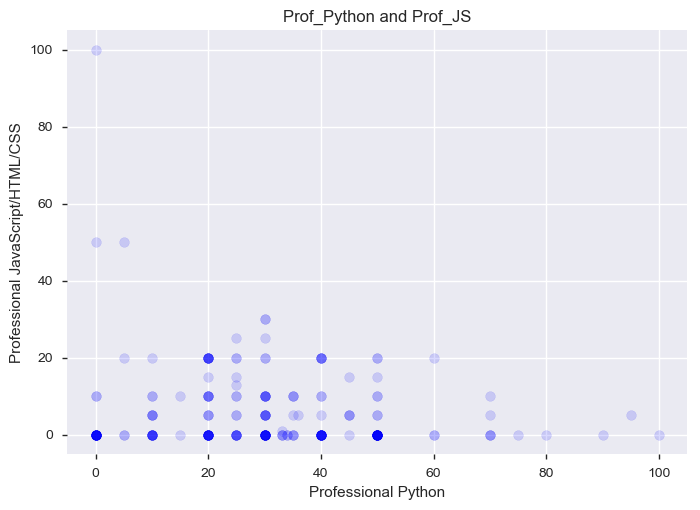

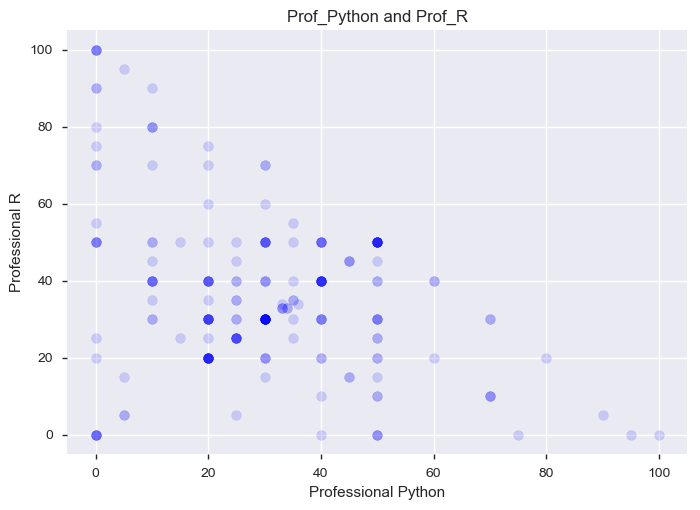

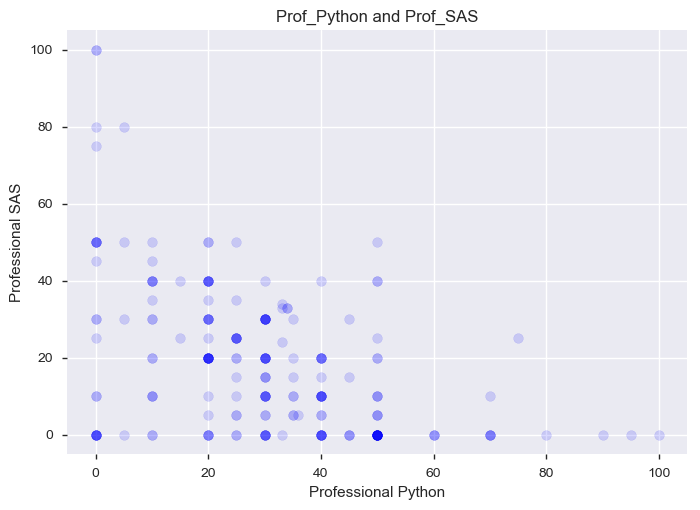

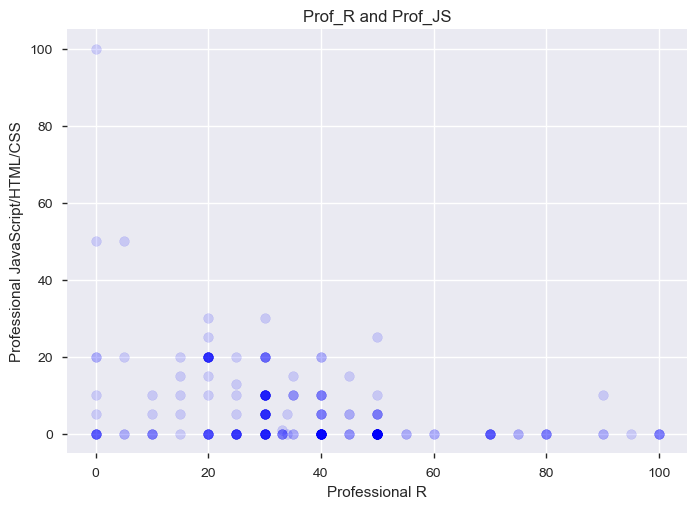

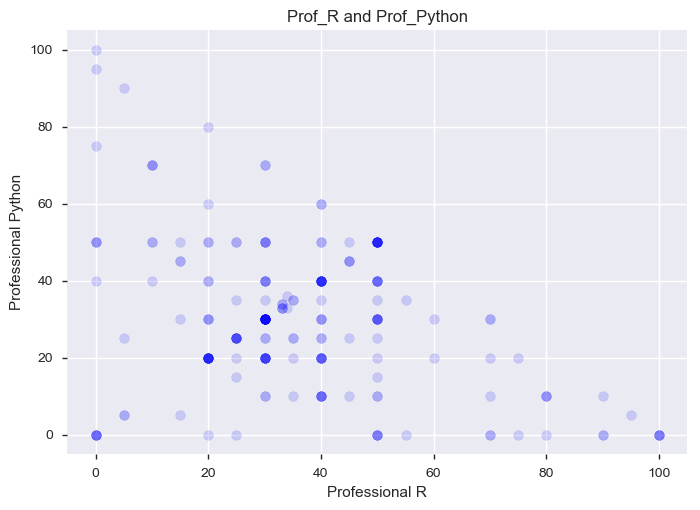

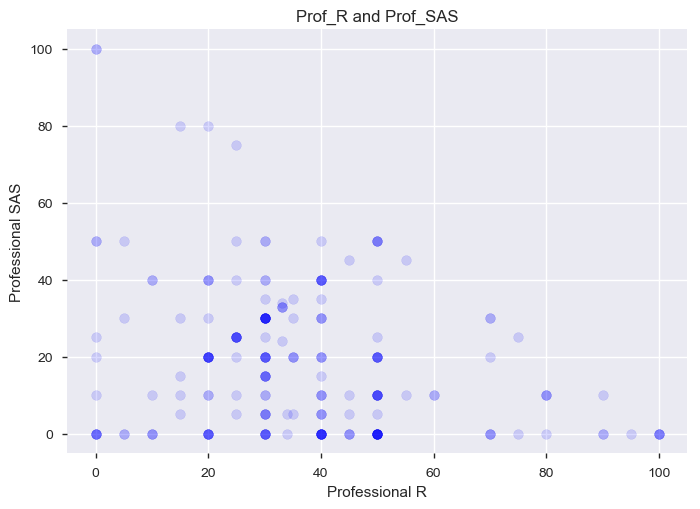

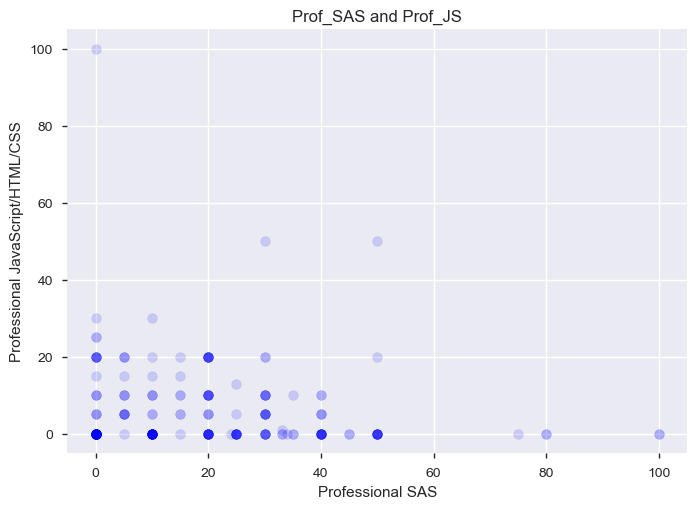

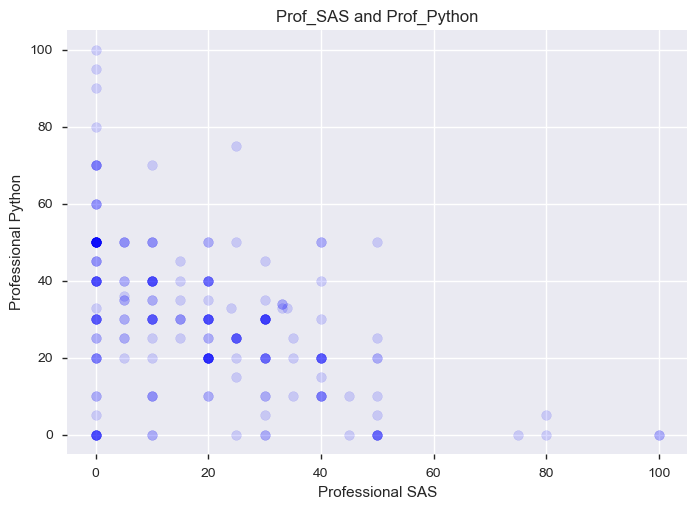

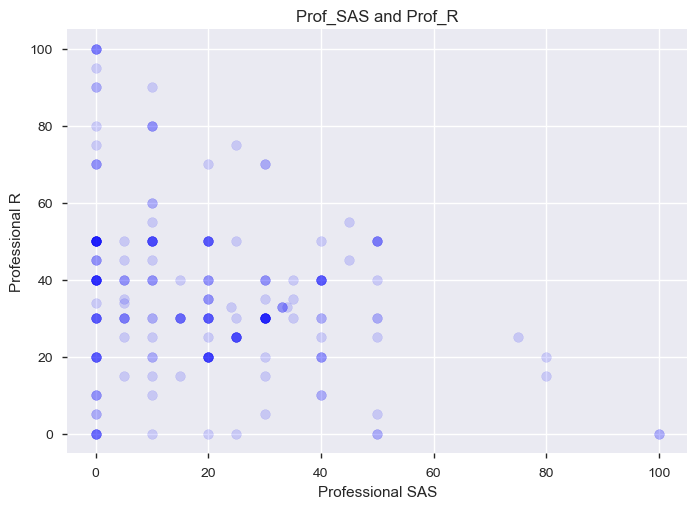

In [33]:
# create a set of scatter plots for Professional preferences (range 6-10)
for i in range(6,10,1):
    for j in range(6,10,1):
        if i != j:
            file_title = survey_df.columns[i] + '_and_' + survey_df.columns[j]
            plot_title = survey_df.columns[i] + ' and ' + survey_df.columns[j]
            fig, axis = plt.subplots()
            axis.set_xlabel(survey_df_labels[i])
            axis.set_ylabel(survey_df_labels[j])
            plt.title(plot_title)
            scatter_plot = axis.scatter(survey_df[survey_df.columns[i]], 
            survey_df[survey_df.columns[j]],
            facecolors = 'blue', 
            edgecolors = 'blue',
            alpha=0.15) 
            plt.savefig(file_title + '.pdf', 
                bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
                orientation='portrait', papertype=None, format=None, 
                transparent=True, pad_inches=0.25, frameon=None)  



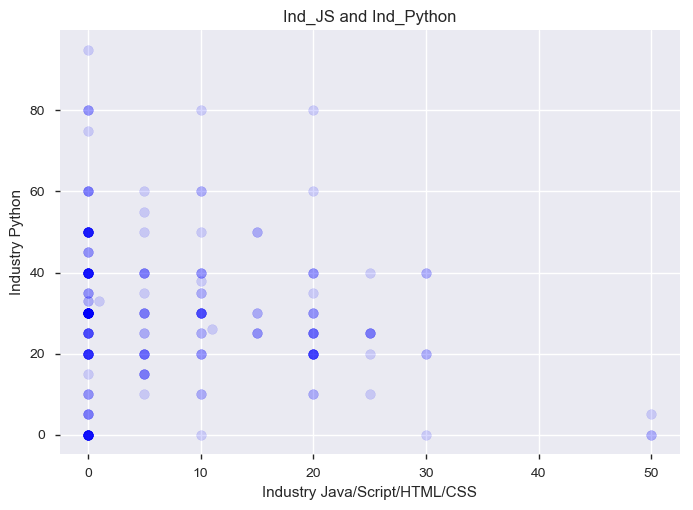

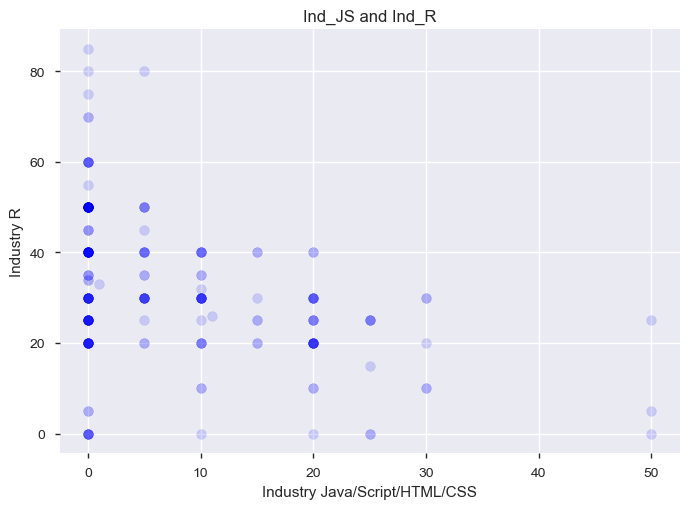

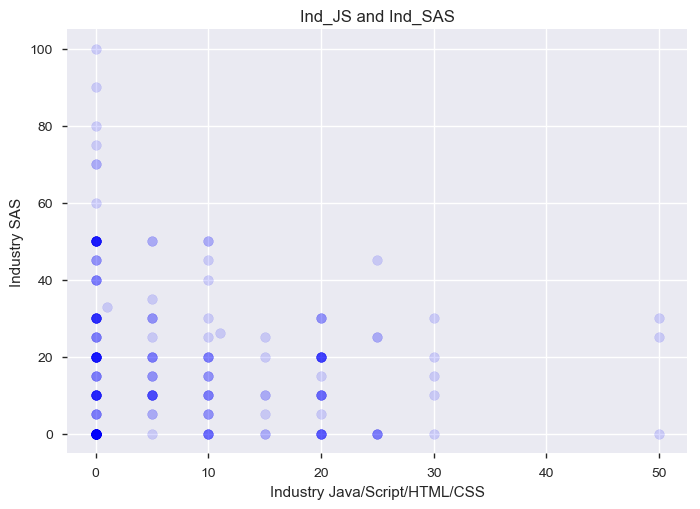

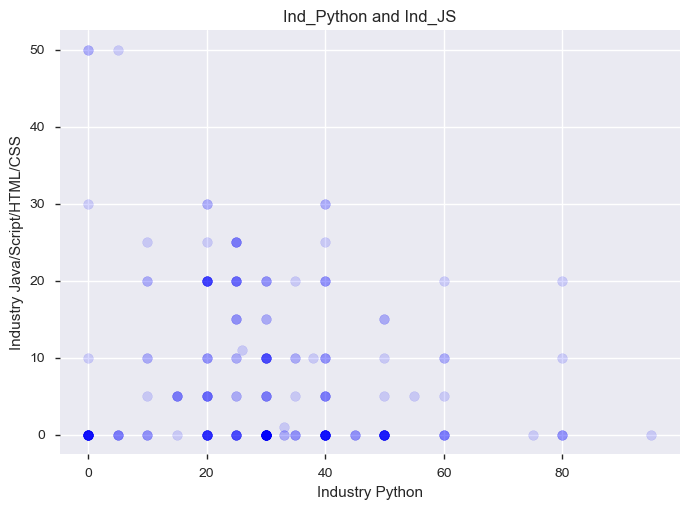

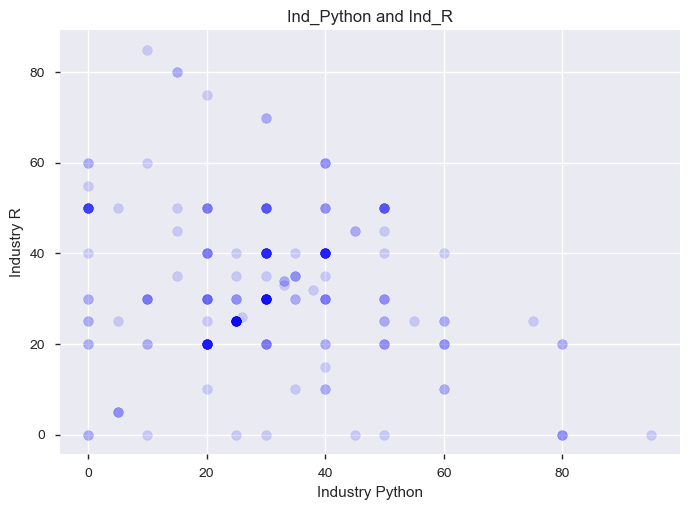

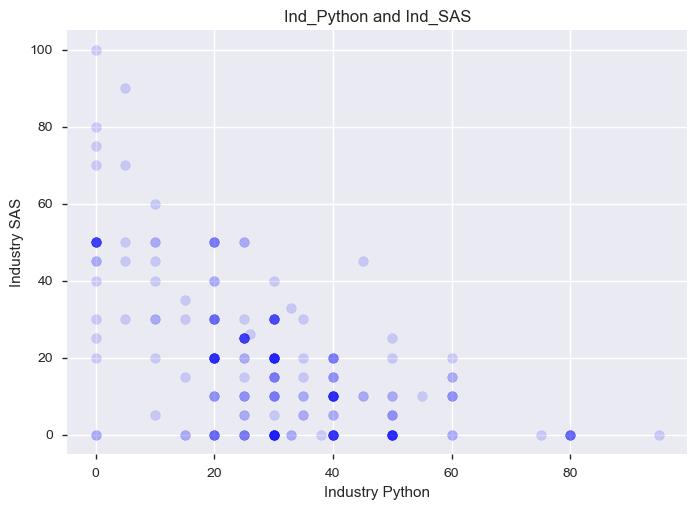

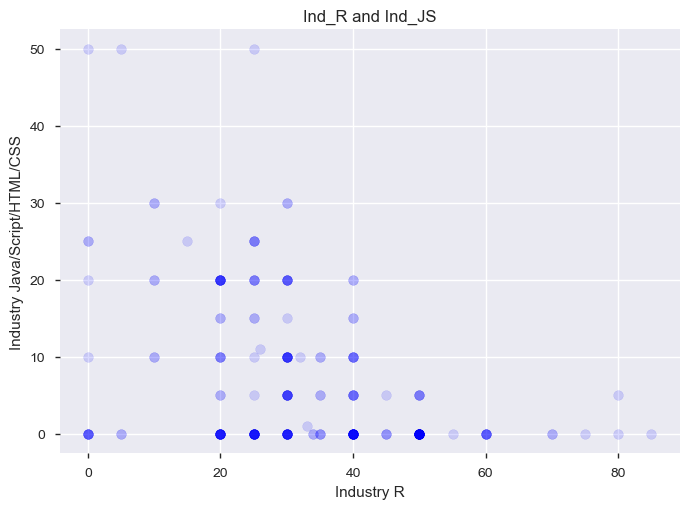

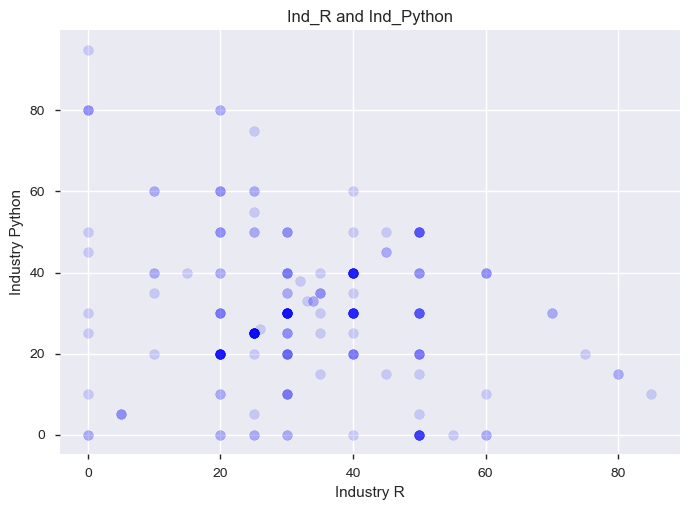

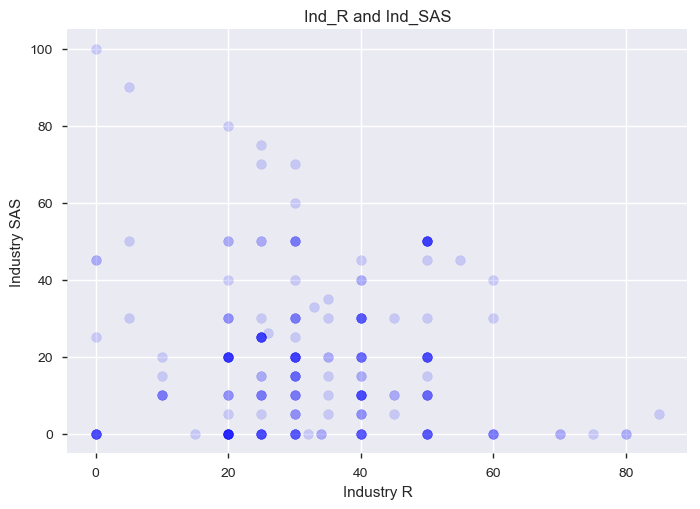

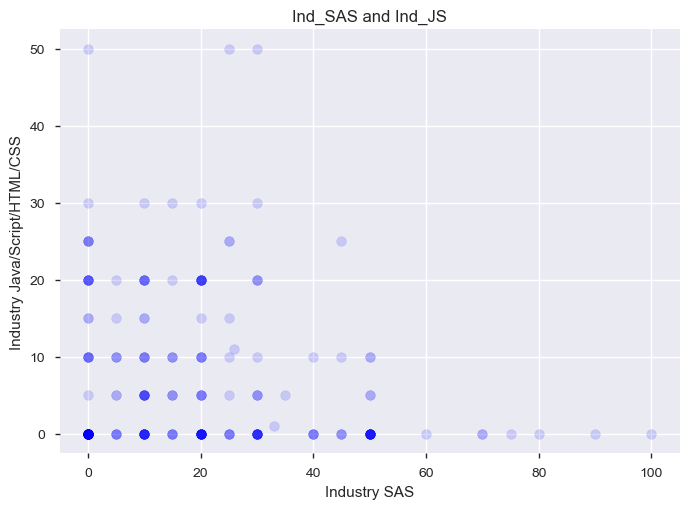

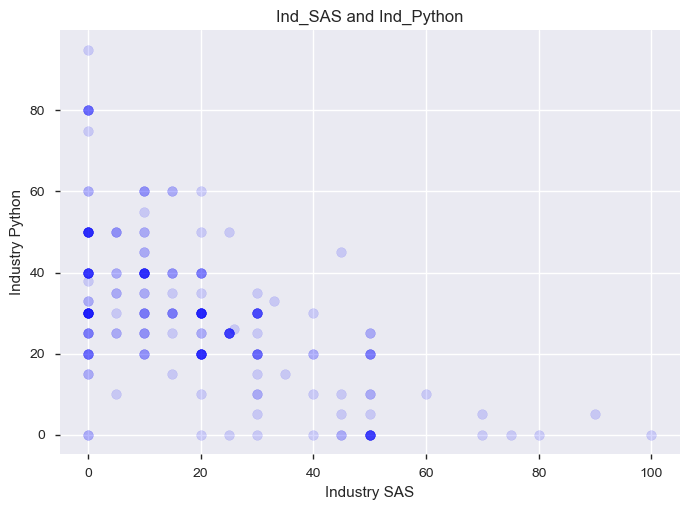

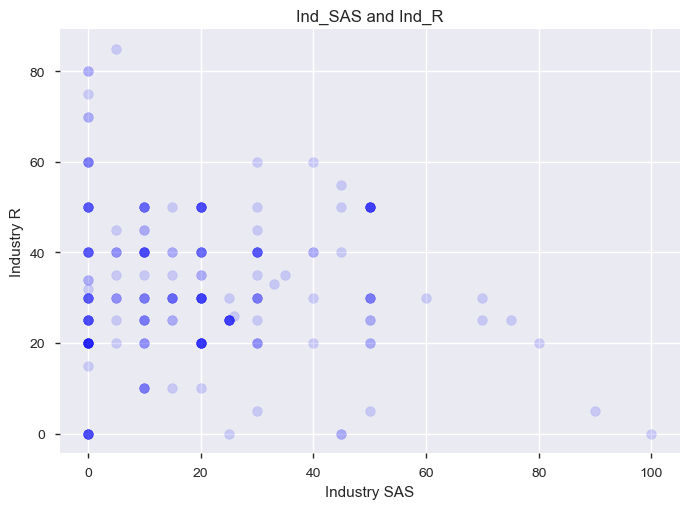

In [34]:
# create a set of scatter plots for industry preferences
for i in range(11,15,1):
    for j in range(11,15,1):
        if i != j:
            file_title = survey_df.columns[i] + '_and_' + survey_df.columns[j]
            plot_title = survey_df.columns[i] + ' and ' + survey_df.columns[j]
            fig, axis = plt.subplots()
            axis.set_xlabel(survey_df_labels[i])
            axis.set_ylabel(survey_df_labels[j])
            plt.title(plot_title)
            scatter_plot = axis.scatter(survey_df[survey_df.columns[i]], 
            survey_df[survey_df.columns[j]],
            facecolors = 'blue', 
            edgecolors = 'blue',
            alpha=0.15) 
            plt.savefig(file_title + '.pdf', 
                bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
                orientation='portrait', papertype=None, format=None, 
                transparent=True, pad_inches=0.25, frameon=None)  



In [35]:
survey.columns

Index(['My_Java', 'My_JS', 'My_Python', 'My_R', 'My_SAS', 'Prof_Java', 'Prof_JS', 'Prof_Python', 'Prof_R', 'Prof_SAS',
       'Ind_Java', 'Ind_JS', 'Ind_Python', 'Ind_R', 'Ind_SAS', 'Python_Course_Interest',
       'Foundations_DE_Course_Interest', 'Analytics_App_Course_Interest', 'Systems_Analysis_Course_Interest',
       'Courses_Completed', 'Grad_2017', 'Grad_2018', 'Grad_2019', 'PREDICT400', 'PREDICT401', 'PREDICT410',
       'PREDICT411', 'PREDICT413', 'PREDICT420', 'PREDICT422', 'PREDICT450', 'PREDICT451', 'PREDICT452', 'PREDICT453',
       'PREDICT454', 'PREDICT455', 'PREDICT456', 'PREDICT457', 'OtherPython', 'OtherR', 'OtherSAS', 'Other'],
      dtype='object')

/Applications/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


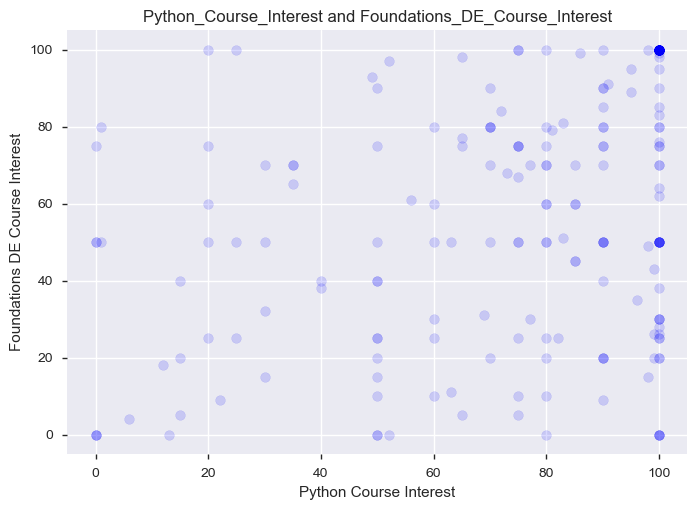

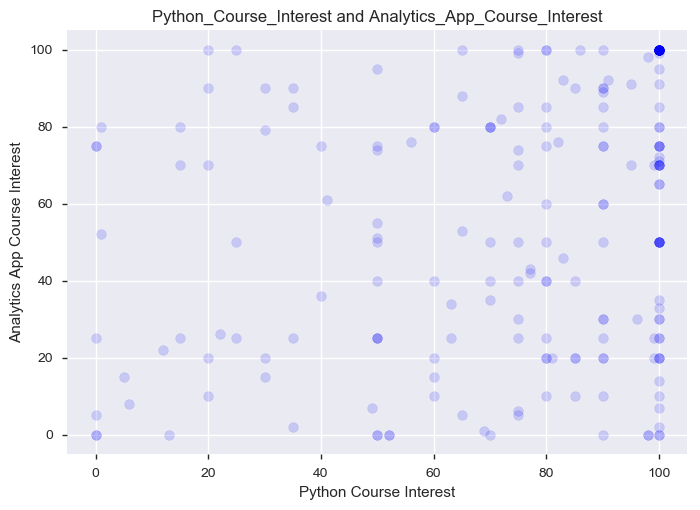

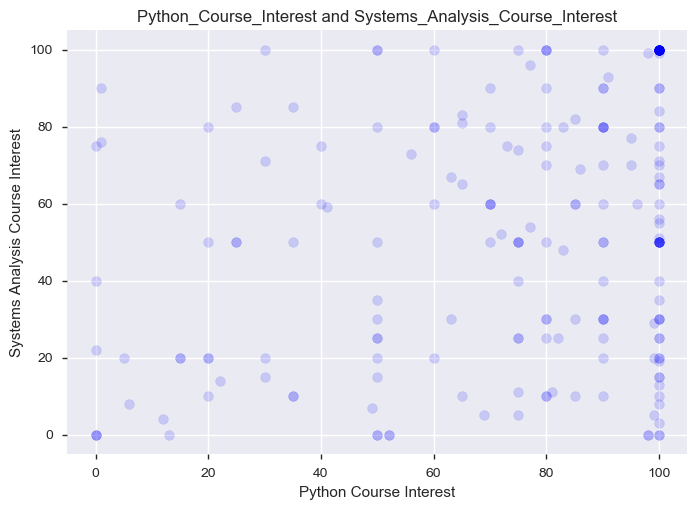

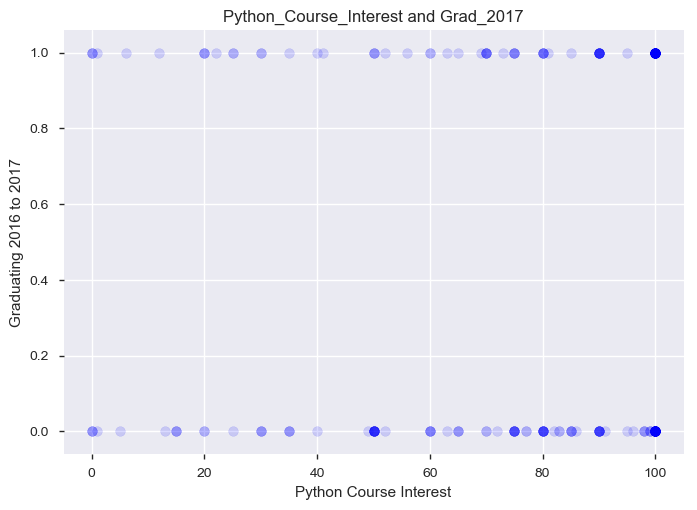

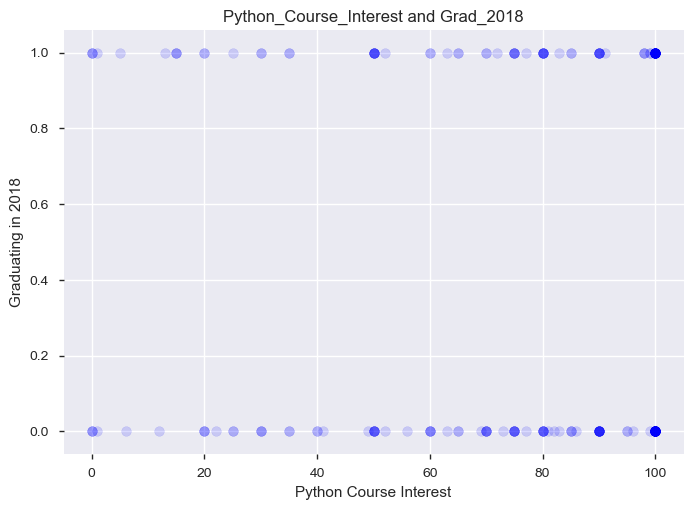

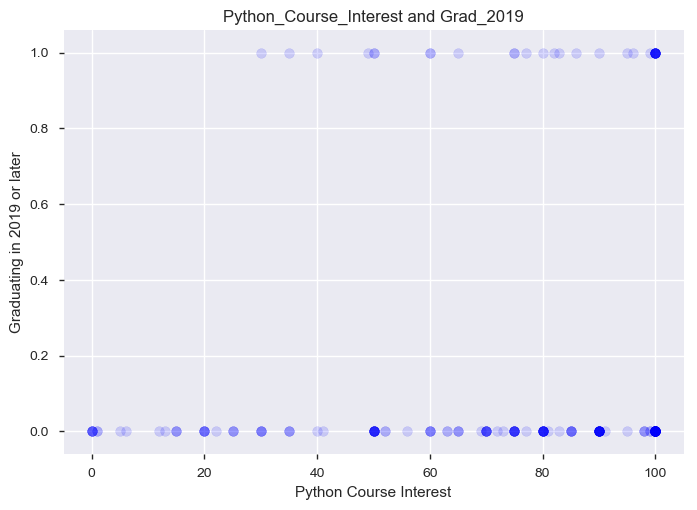

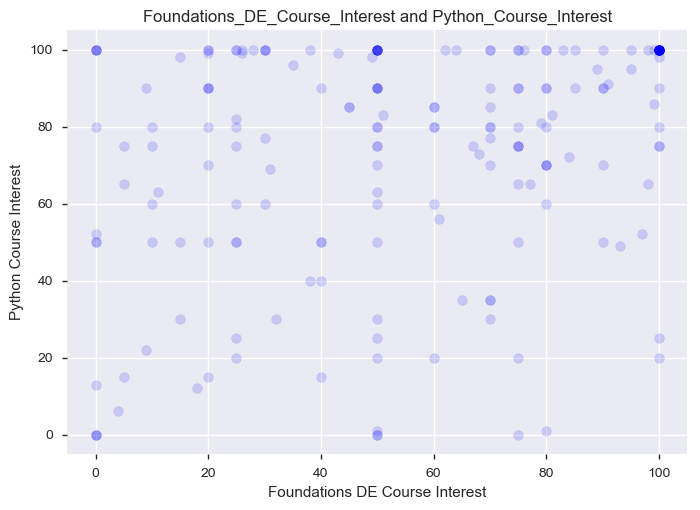

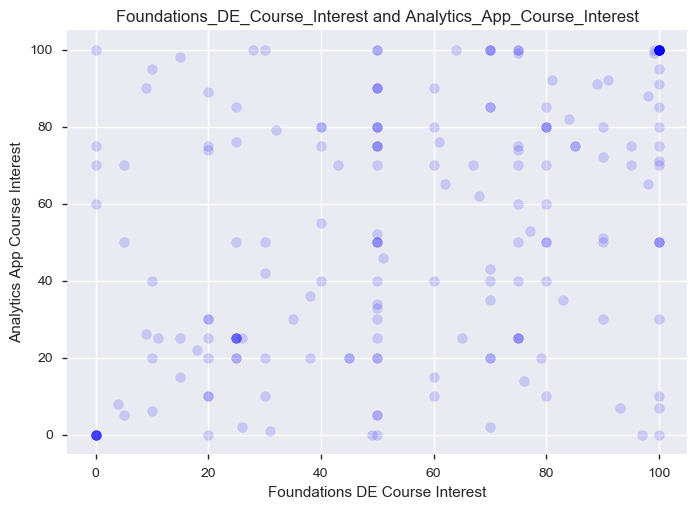

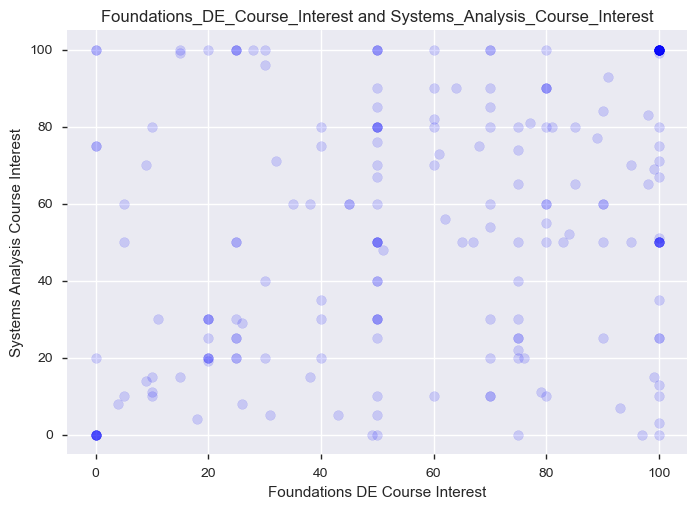

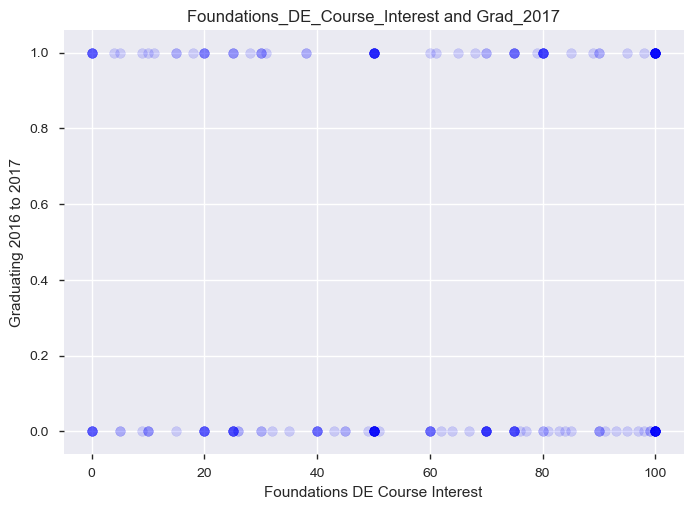

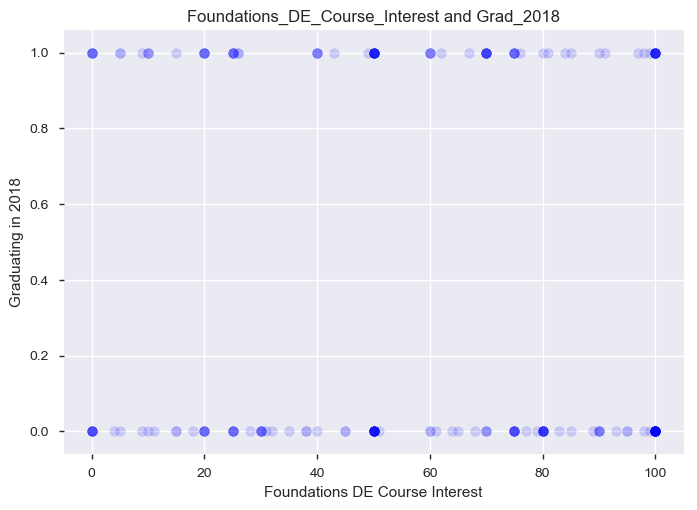

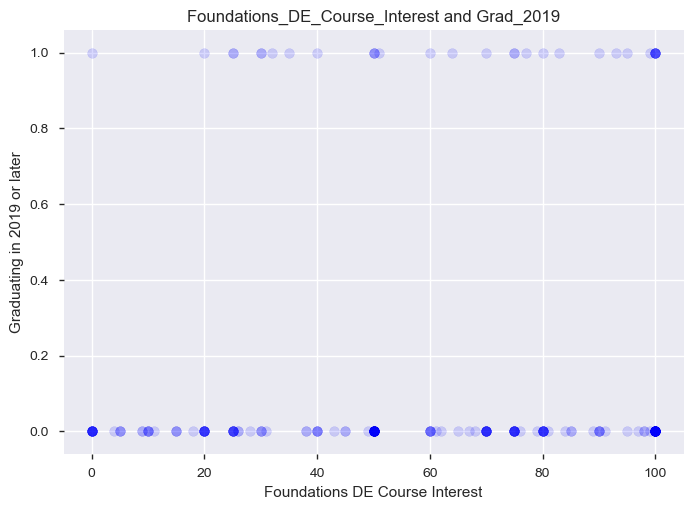

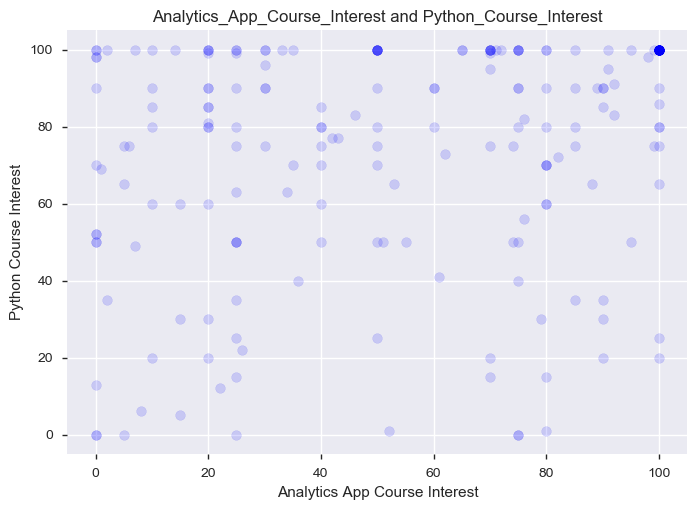

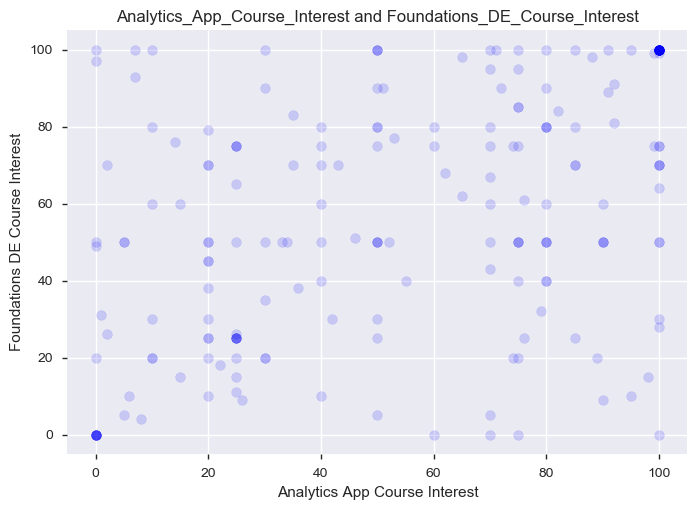

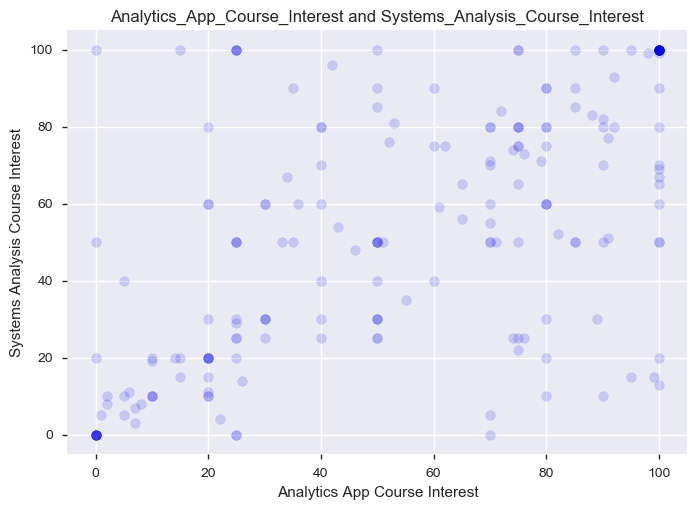

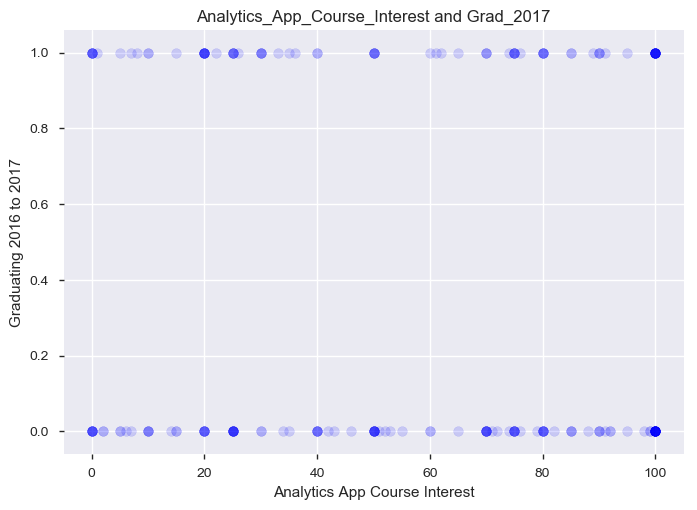

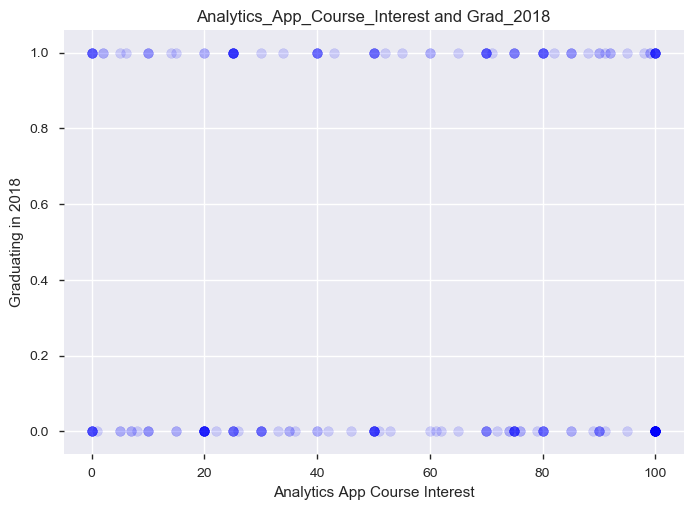

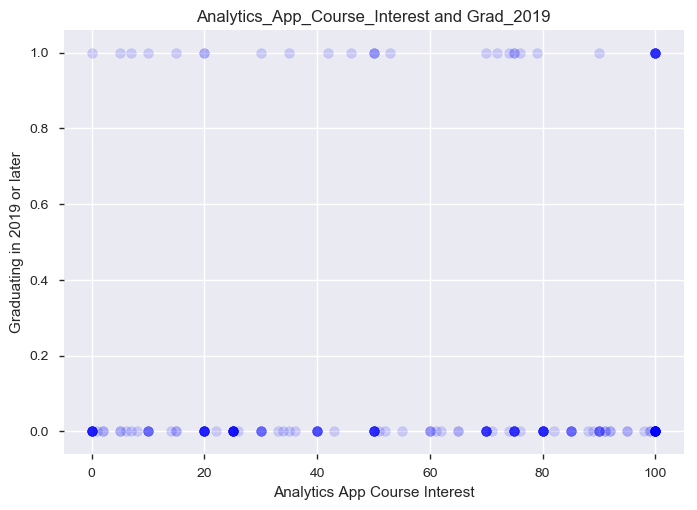

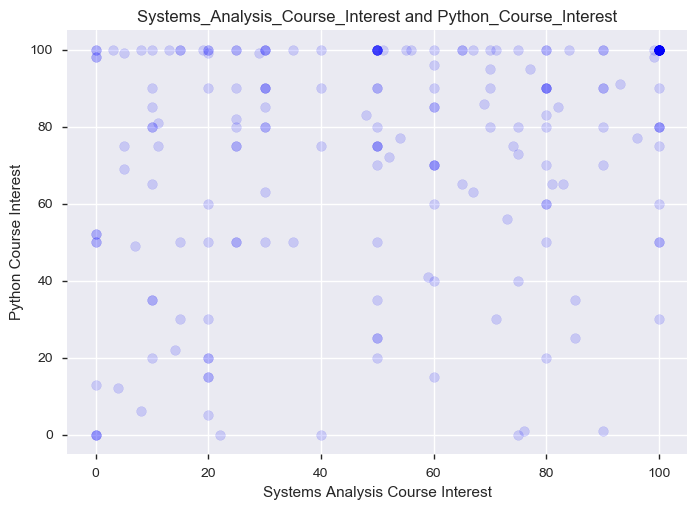

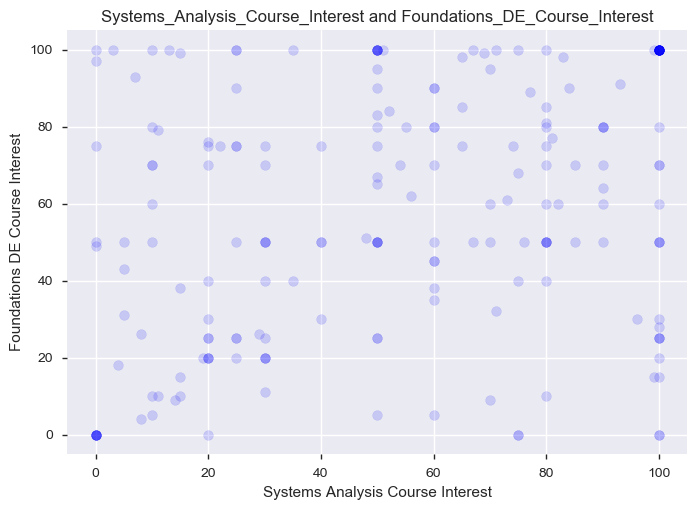

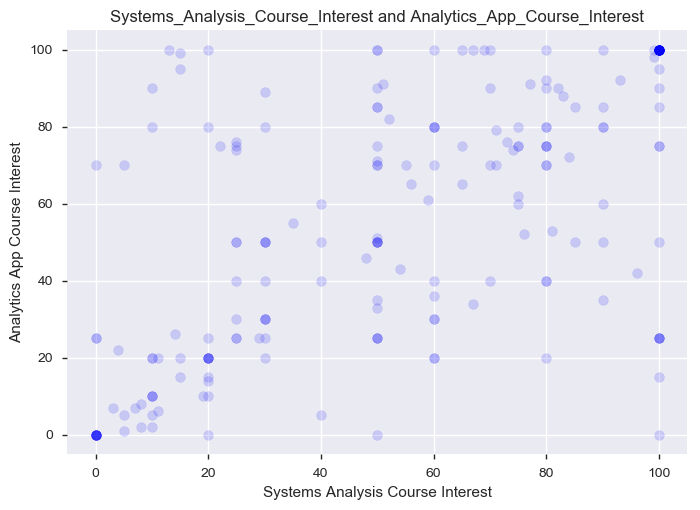

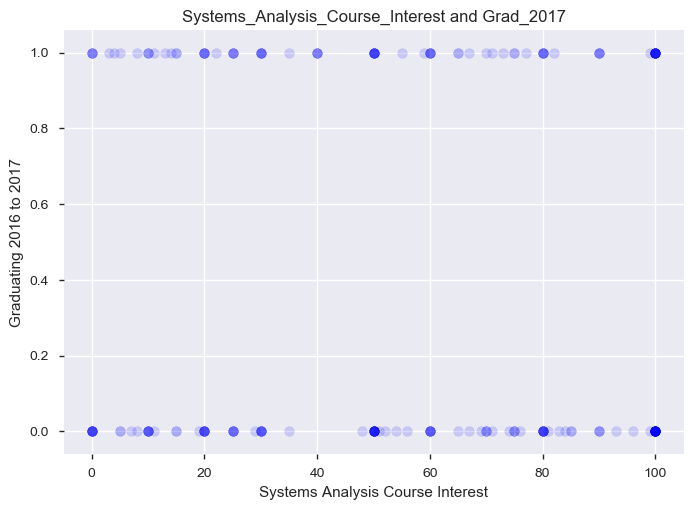

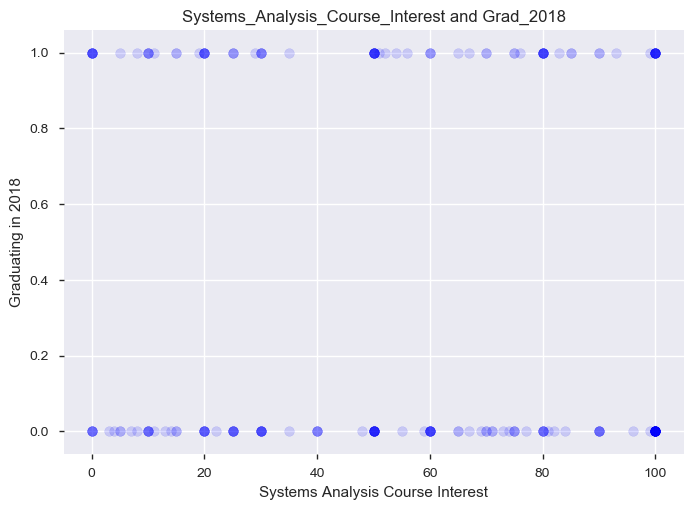

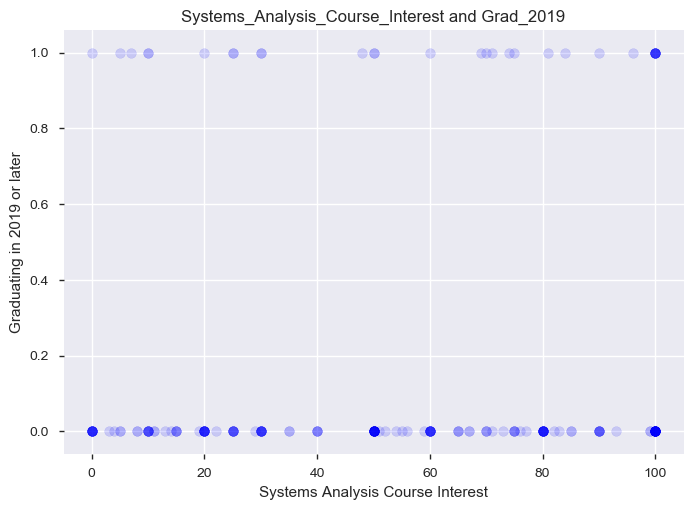

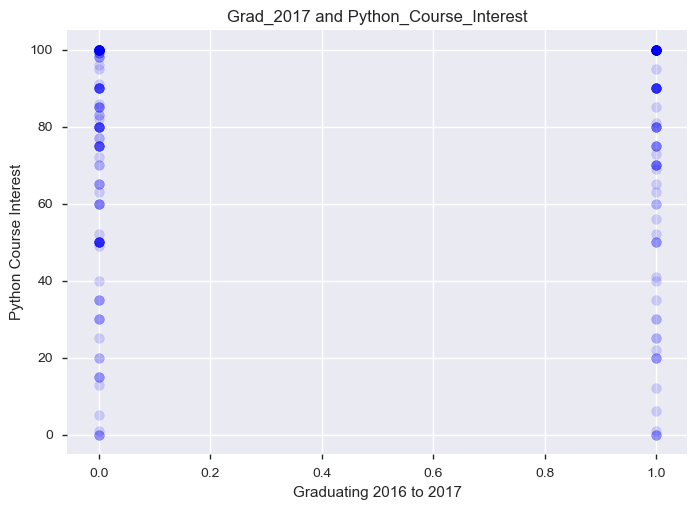

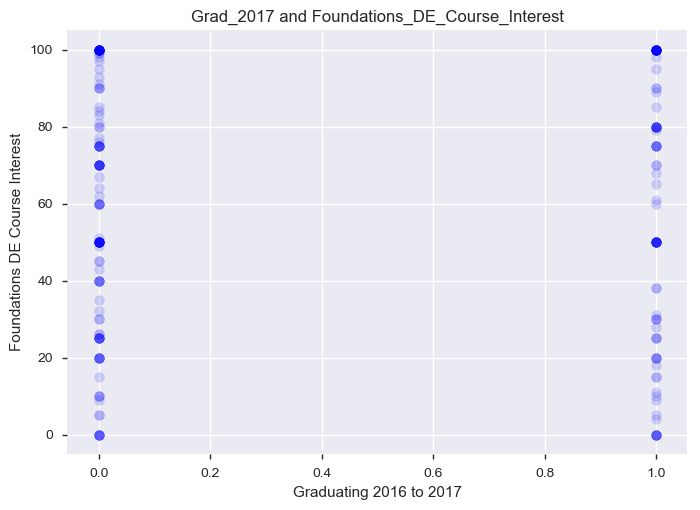

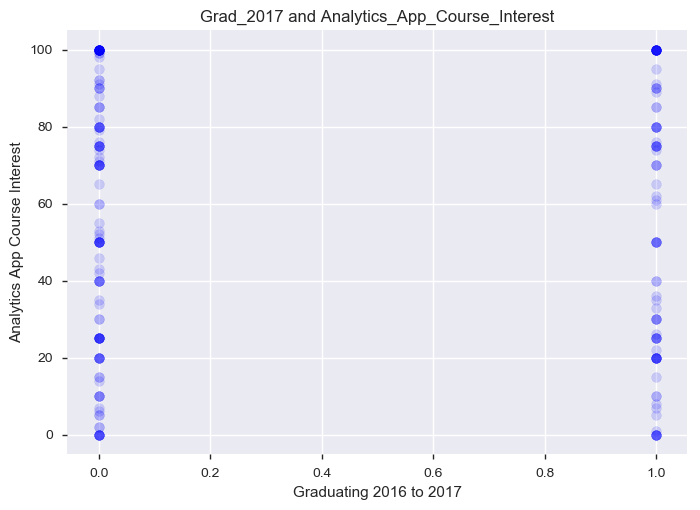

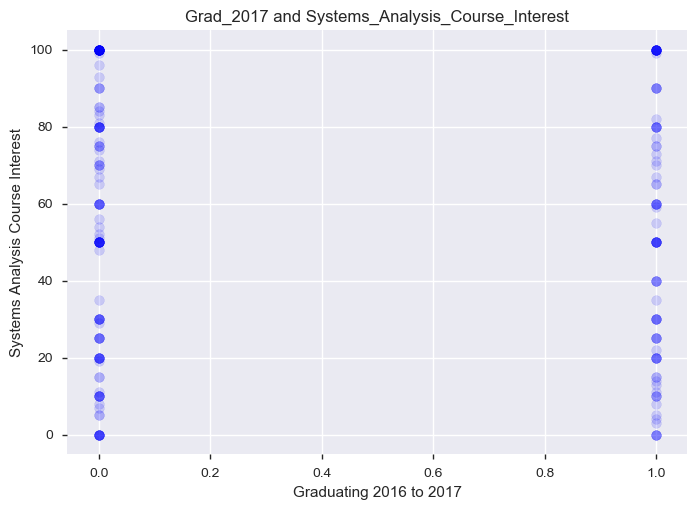

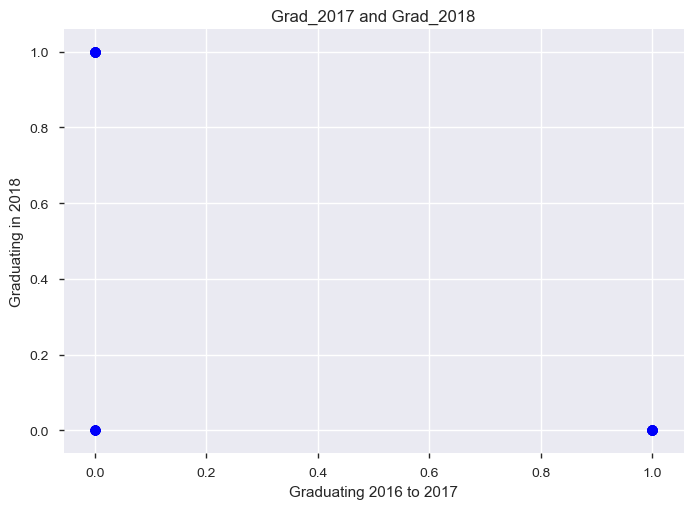

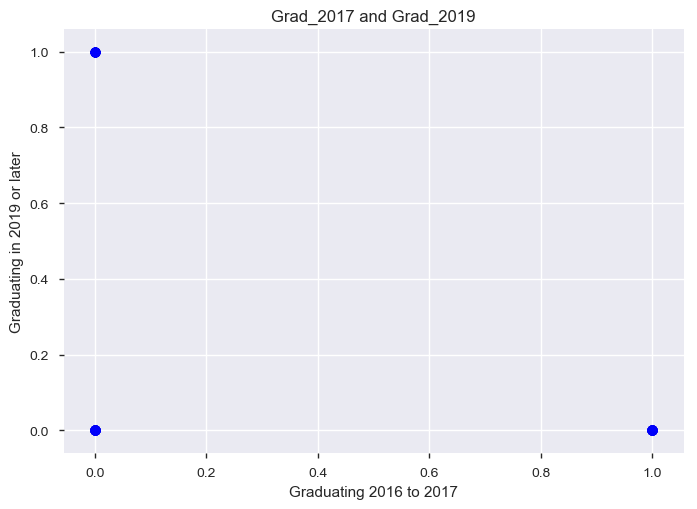

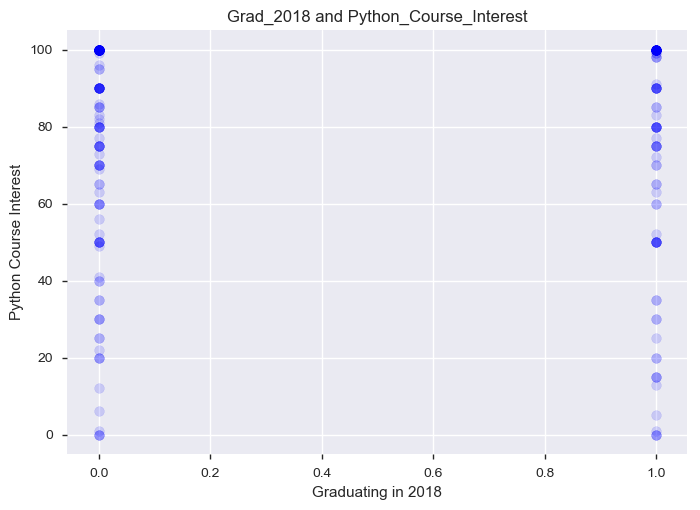

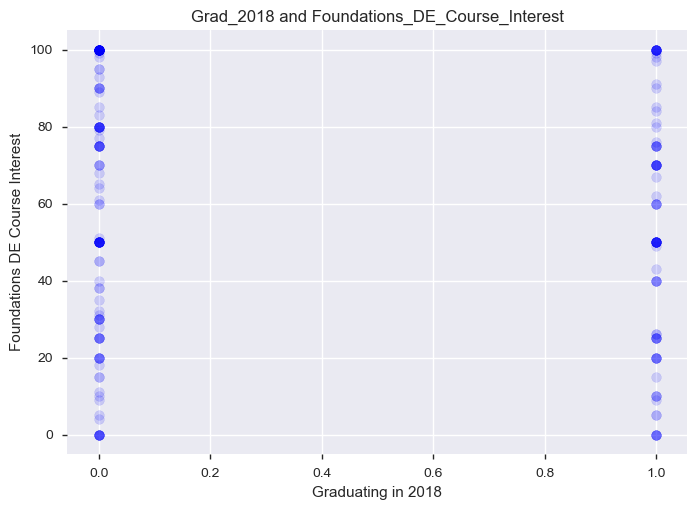

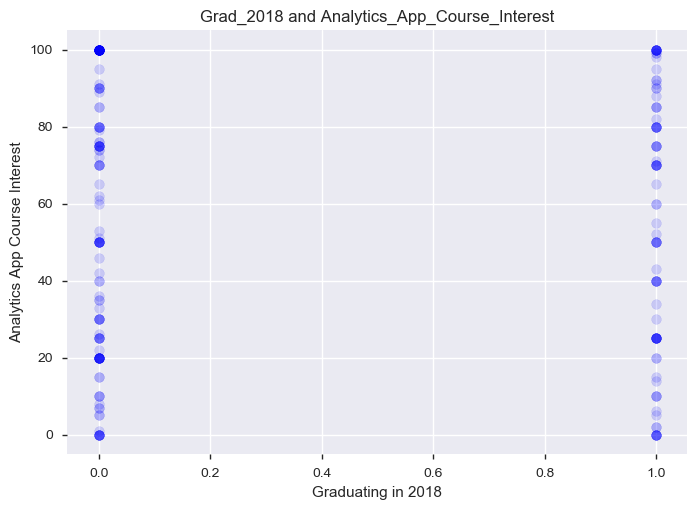

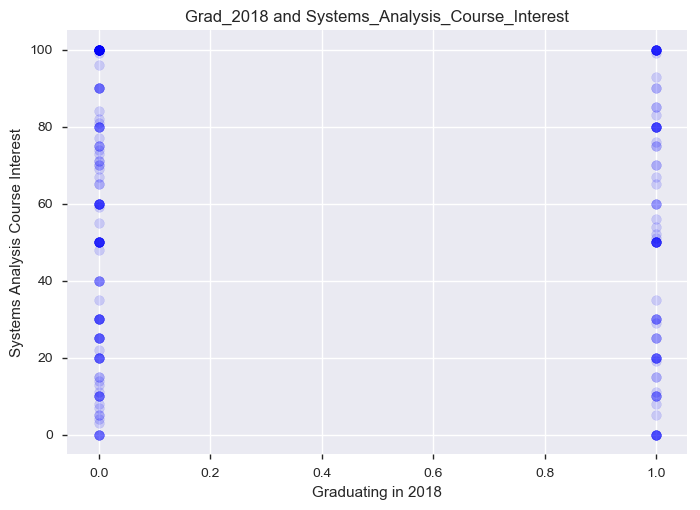

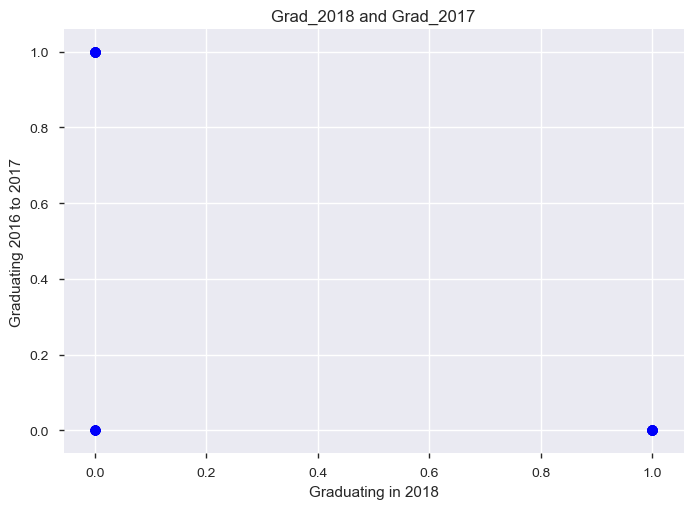

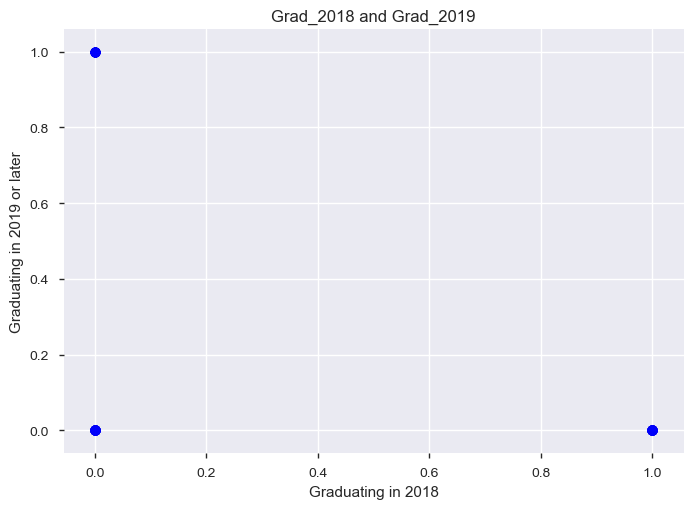

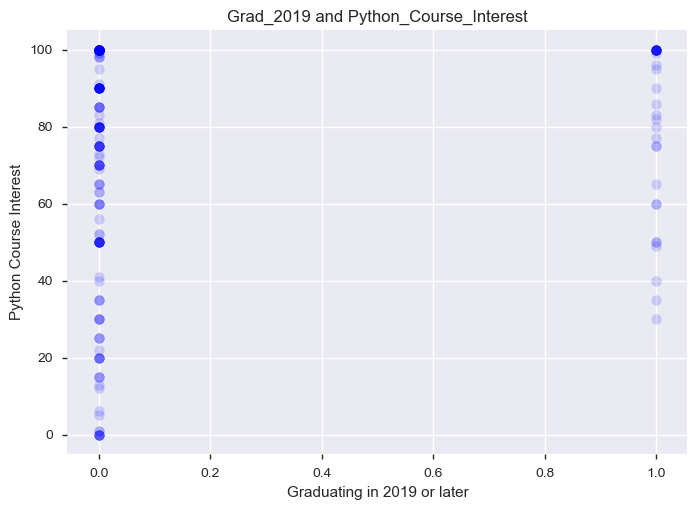

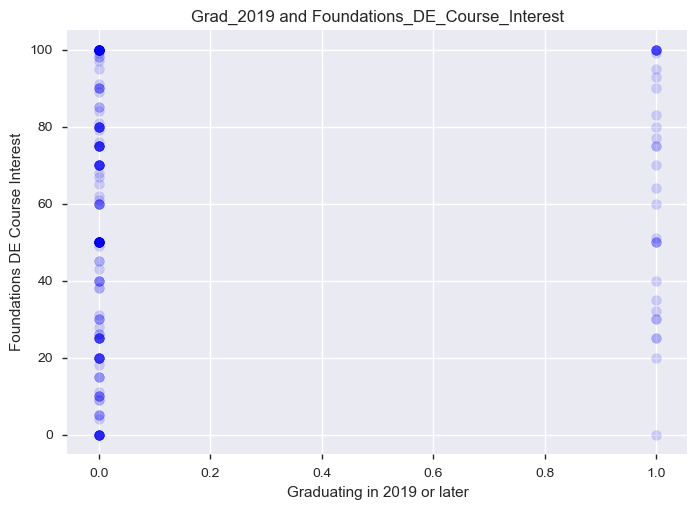

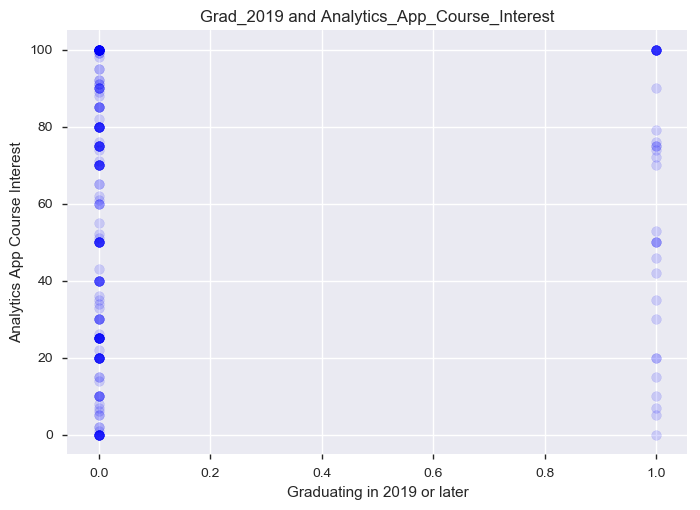

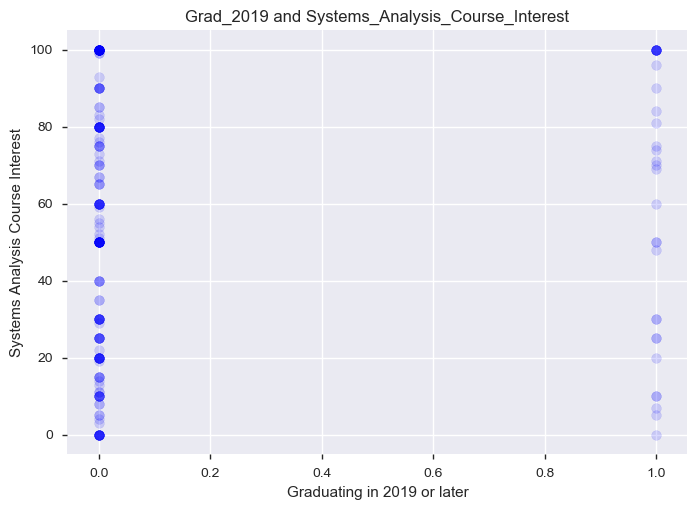

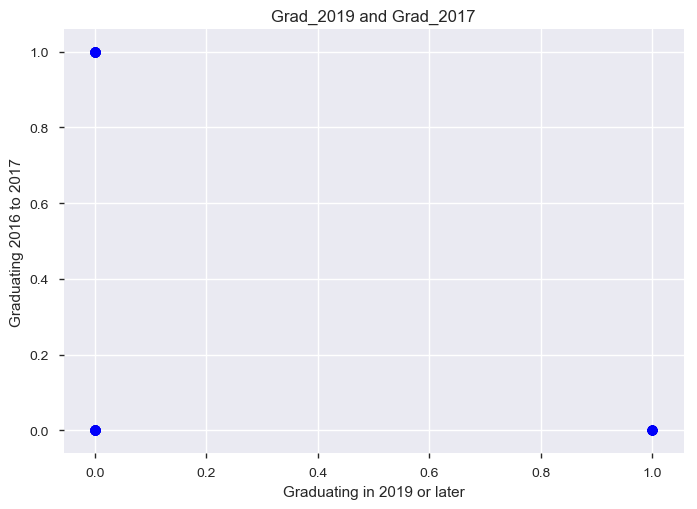

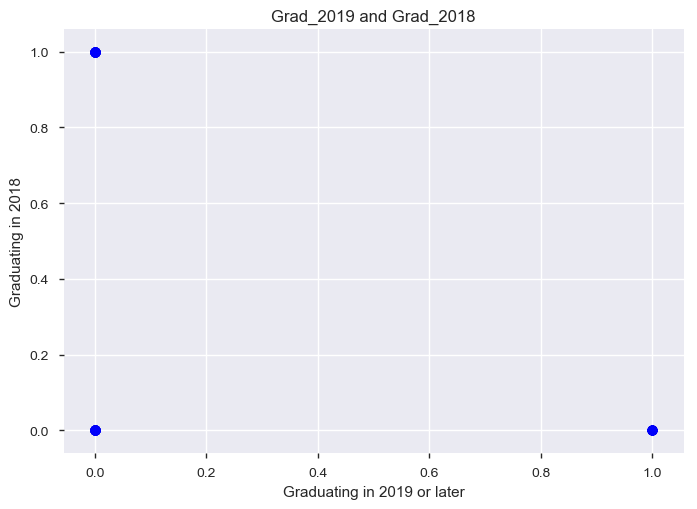

In [36]:
# Graduation Year and  Course Preference
survey_pref=survey[['Python_Course_Interest',
                    'Foundations_DE_Course_Interest', 
                    'Analytics_App_Course_Interest', 
                    'Systems_Analysis_Course_Interest', 
                    'Grad_2017', 
                    'Grad_2018',
                    'Grad_2019'
                   ]]
#label names
survey_pref_labels = [
    'Python Course Interest',
    'Foundations DE Course Interest',
    'Analytics App Course Interest',
    'Systems Analysis Course Interest',
    'Graduating 2016 to 2017',
    'Graduating in 2018',
    'Graduating in 2019 or later'
]    

# create a set of scatter plots for course interest and graduation years
for i in range(7):
    for j in range(7):
        if i != j:
            file_title = survey_pref.columns[i] + '_and_' + survey_pref.columns[j]
            plot_title = survey_pref.columns[i] + ' and ' + survey_pref.columns[j]
            fig, axis = plt.subplots()
            axis.set_xlabel(survey_pref_labels[i])
            axis.set_ylabel(survey_pref_labels[j])
            plt.title(plot_title)
            scatter_plot = axis.scatter(survey_pref[survey_pref.columns[i]], 
            survey_pref[survey_pref.columns[j]],
            facecolors = 'blue', 
            edgecolors = 'blue',
            alpha=0.15) 
            plt.savefig(file_title + '.pdf', 
                bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
                orientation='portrait', papertype=None, format=None, 
                transparent=True, pad_inches=0.25, frameon=None) 

In [123]:
# correlation heat map setup for seaborn
def corr_chart(df_corr):
    corr=df_corr.corr()
    #screen top half to get a triangle
    top = np.zeros_like(corr, dtype=np.bool)
    top[np.triu_indices_from(top)] = True
    fig=plt.figure()
    fig, ax = plt.subplots(figsize=(12,12))
    sns.heatmap(corr, mask=top, cmap='coolwarm', 
        center = 0, square=True, 
        linewidths=.5, cbar_kws={'shrink':.5}, 
        annot = True, annot_kws={'size': 9}, fmt = '.3f')           
    plt.xticks(rotation=45) # rotate variable labels on columns (x axis)
    plt.yticks(rotation=0) # use horizontal variable labels on rows (y axis)
    plt.title('Correlation Heat Map')   
    plt.savefig('Prefence_Heat_Map.pdf', 
        bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
        orientation='portrait', papertype=None, format=None, 
        transparent=True, pad_inches=0.25, frameon=None)      

<Figure size 800x550 with 0 Axes>

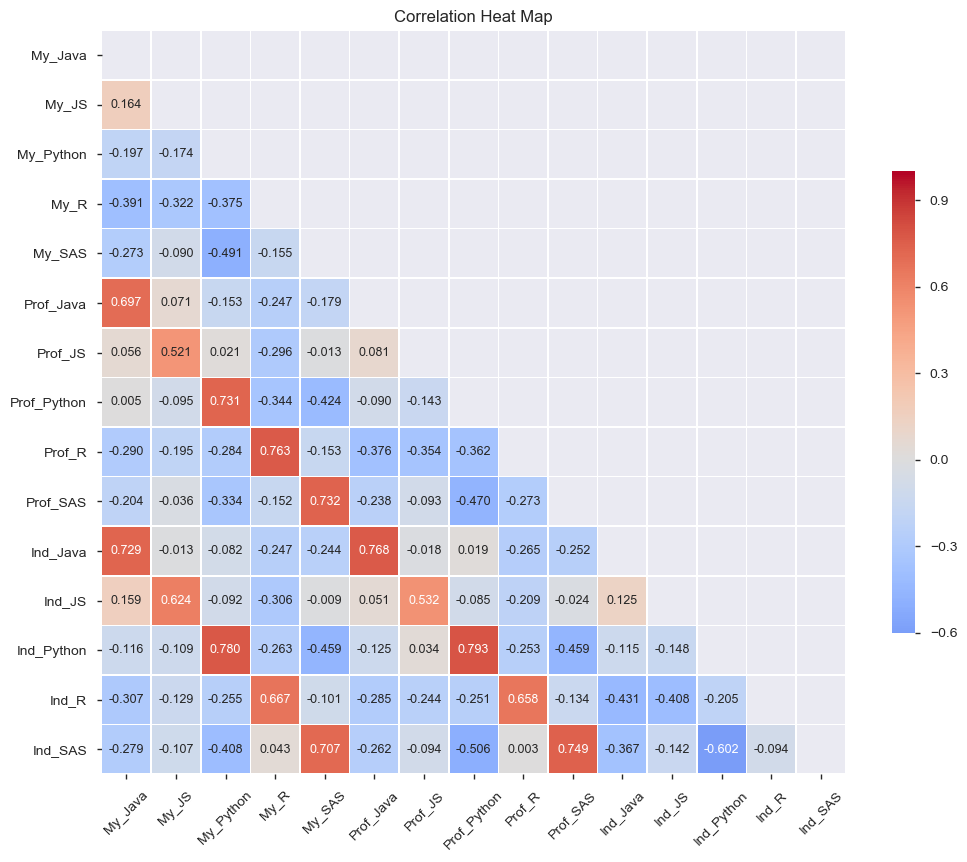

In [124]:
# define subset DataFrame for analysis of software preferences 
software_df = survey_df.loc[:, 'My_Java':'Ind_SAS']

# examine intercorrelations among software preference variables
# with correlation matrix/heat map
corr_chart(df_corr = software_df)

In [39]:
# correlation heat map setup for seaborn
#without numerical correlations which just overwhelm this graphic
def corr_chart_no(df_corr):
    corr=df_corr.corr()
    #screen top half to get a triangle
    top = np.zeros_like(corr, dtype=np.bool)
    top[np.triu_indices_from(top)] = True
    fig=plt.figure()
    fig, ax = plt.subplots(figsize=(12,12))
    sns.heatmap(corr, mask=top, cmap='coolwarm', 
        center = 0, square=True, 
        linewidths=.5, cbar_kws={'shrink':.5}, 
        annot = False, annot_kws={'size': 9}, fmt = '.3f')           
    plt.xticks(rotation=45) # rotate variable labels on columns (x axis)
    plt.yticks(rotation=0) # use horizontal variable labels on rows (y axis)
    plt.title('Correlation Heat Map')   
    plt.savefig('plot-corr-map.pdf', 
        bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
        orientation='portrait', papertype=None, format=None, 
        transparent=True, pad_inches=0.25, frameon=None)      

<Figure size 800x550 with 0 Axes>

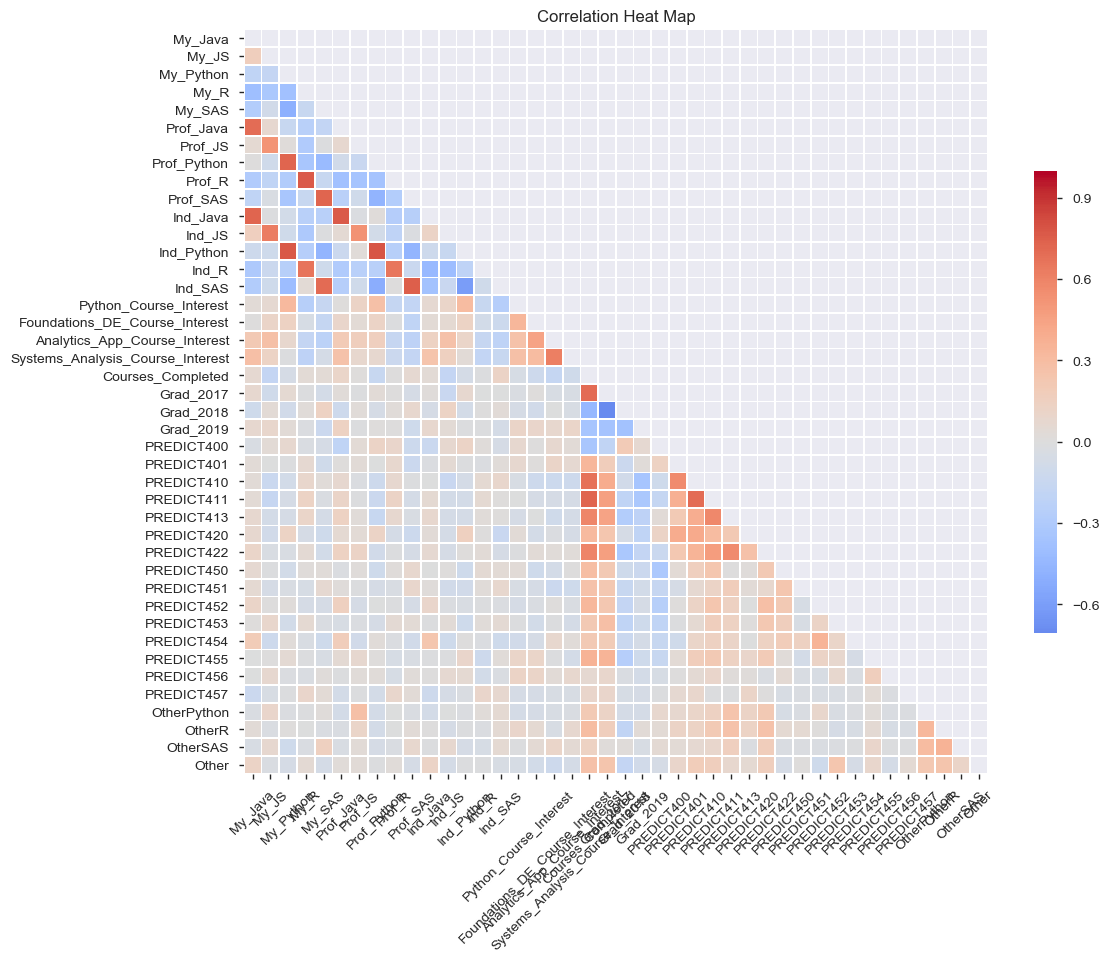

In [40]:
#view correlation chart for all variables 
corr_chart_no(survey)
#save_fig("surve_corr_chart")

In [41]:
#get all correlation coefficients
corr_matrix = survey.corr()

In [42]:
#Correlation between Python Course interest and other variables, 
#ranked from highest correlation to lowest
corr_matrix["Python_Course_Interest"].sort_values(ascending=False)

Python_Course_Interest              1.000000
Foundations_DE_Course_Interest      0.337504
My_Python                           0.323268
Ind_Python                          0.303357
Prof_Python                         0.280337
Systems_Analysis_Course_Interest    0.278808
Analytics_App_Course_Interest       0.255525
Prof_JS                             0.125292
PREDICT456                          0.115250
Grad_2019                           0.111409
PREDICT455                          0.105824
Ind_JS                              0.101687
OtherR                              0.094999
PREDICT400                          0.079306
PREDICT401                          0.072604
Ind_Java                            0.068279
My_JS                               0.067480
PREDICT420                          0.041273
PREDICT450                          0.038531
My_Java                             0.035031
Prof_Java                           0.011019
PREDICT411                          0.001551
OtherSAS  

In [43]:
#Correlation between Data Engineering interest and other variables, 
#ranked from highest correlation to lowest
corr_matrix["Foundations_DE_Course_Interest"].sort_values(ascending=False)

Foundations_DE_Course_Interest      1.000000
Analytics_App_Course_Interest       0.449018
Python_Course_Interest              0.337504
Systems_Analysis_Course_Interest    0.303449
My_Python                           0.137317
Ind_Python                          0.132708
Prof_Python                         0.126994
PREDICT456                          0.112467
My_JS                               0.110053
PREDICT455                          0.107332
Grad_2019                           0.101350
Prof_Java                           0.095806
Ind_JS                              0.060183
OtherR                              0.058097
OtherSAS                            0.052422
Ind_Java                            0.046988
Prof_JS                             0.046033
PREDICT422                          0.036236
Grad_2017                           0.010697
PREDICT401                          0.009543
PREDICT400                          0.007180
My_Java                             0.006791
PREDICT413

In [44]:
#Correlation between Analytics Application interest and other variables, 
#ranked from highest correlation to lowest
corr_matrix["Analytics_App_Course_Interest"].sort_values(ascending=False)

Analytics_App_Course_Interest       1.000000
Systems_Analysis_Course_Interest    0.616155
Foundations_DE_Course_Interest      0.449018
My_JS                               0.275509
Ind_JS                              0.268022
Python_Course_Interest              0.255525
My_Java                             0.214576
Prof_Java                           0.196477
Prof_JS                             0.162689
Prof_Python                         0.160152
Ind_Java                            0.135703
PREDICT401                          0.113687
Ind_Python                          0.103773
OtherSAS                            0.101901
Grad_2019                           0.087143
PREDICT454                          0.083962
My_Python                           0.082331
PREDICT400                          0.077878
PREDICT456                          0.037390
PREDICT422                          0.033773
PREDICT452                          0.011444
Grad_2018                          -0.002045
PREDICT453

In [45]:
#Correlation between Systems Analysis interest and other variables, 
#ranked from highest correlation to lowest
corr_matrix["Systems_Analysis_Course_Interest"].sort_values(ascending=False)

Systems_Analysis_Course_Interest    1.000000
Analytics_App_Course_Interest       0.616155
Foundations_DE_Course_Interest      0.303449
My_Java                             0.286510
Python_Course_Interest              0.278808
Prof_Java                           0.264264
Ind_Java                            0.252574
Ind_JS                              0.151400
My_JS                               0.133517
Grad_2019                           0.107558
Prof_JS                             0.086995
PREDICT456                          0.085175
Prof_Python                         0.080476
OtherR                              0.080353
PREDICT401                          0.066886
OtherSAS                            0.049177
PREDICT400                          0.037139
Ind_Python                          0.035831
PREDICT454                          0.033360
PREDICT422                          0.026574
PREDICT450                          0.008194
My_Python                          -0.008505
OtherPytho

In [46]:
#Correlation between 2019 Graduation Date and other variables, 
#ranked from highest correlation to lowest
corr_matrix["Grad_2019"].sort_values(ascending=False)

Grad_2019                           1.000000
Prof_Java                           0.140360
Python_Course_Interest              0.111409
Systems_Analysis_Course_Interest    0.107558
Foundations_DE_Course_Interest      0.101350
My_JS                               0.091410
Analytics_App_Course_Interest       0.087143
Ind_Java                            0.084477
My_Java                             0.073836
PREDICT400                          0.064981
Ind_JS                              0.046312
OtherR                              0.040367
My_Python                           0.036495
PREDICT401                          0.025734
Prof_Python                         0.011086
Prof_R                              0.006529
Ind_R                              -0.005277
Prof_JS                            -0.011915
Ind_Python                         -0.018051
My_R                               -0.021006
OtherSAS                           -0.043015
PREDICT452                         -0.058338
PREDICT457

In [47]:
#Correlation between 2018 graduation date and other variables, 
#ranked from highest correlation to lowest
corr_matrix["Grad_2018"].sort_values(ascending=False)

Grad_2018                           1.000000
PREDICT400                          0.198403
My_SAS                              0.134971
Ind_JS                              0.130206
Prof_SAS                            0.088247
My_JS                               0.045732
Ind_SAS                             0.041063
Prof_JS                             0.030637
My_R                                0.028449
Prof_R                              0.023224
OtherSAS                            0.016945
Ind_R                               0.002229
Analytics_App_Course_Interest      -0.002045
PREDICT456                         -0.028793
Systems_Analysis_Course_Interest   -0.044459
PREDICT457                         -0.047130
Prof_Python                        -0.052095
Python_Course_Interest             -0.052754
Ind_Java                           -0.055470
PREDICT420                         -0.055630
OtherPython                        -0.068786
Ind_Python                         -0.073030
My_Python 

In [48]:
#Correlation between 2017 and sooner graduation dates and other variables, 
#ranked from highest correlation to lowest
corr_matrix["Grad_2017"].sort_values(ascending=False)

Grad_2017                           1.000000
Courses_Completed                   0.706593
PREDICT422                          0.472107
PREDICT411                          0.465449
PREDICT413                          0.451879
PREDICT410                          0.395738
PREDICT455                          0.353747
PREDICT453                          0.283817
Other                               0.246644
PREDICT420                          0.238980
PREDICT452                          0.229174
PREDICT451                          0.224132
PREDICT450                          0.215292
PREDICT454                          0.188486
PREDICT401                          0.175723
OtherR                              0.166246
OtherPython                         0.124525
PREDICT457                          0.096836
PREDICT456                          0.089922
My_Java                             0.078261
Ind_Python                          0.069773
My_Python                           0.055715
Prof_Pytho

# Transformation

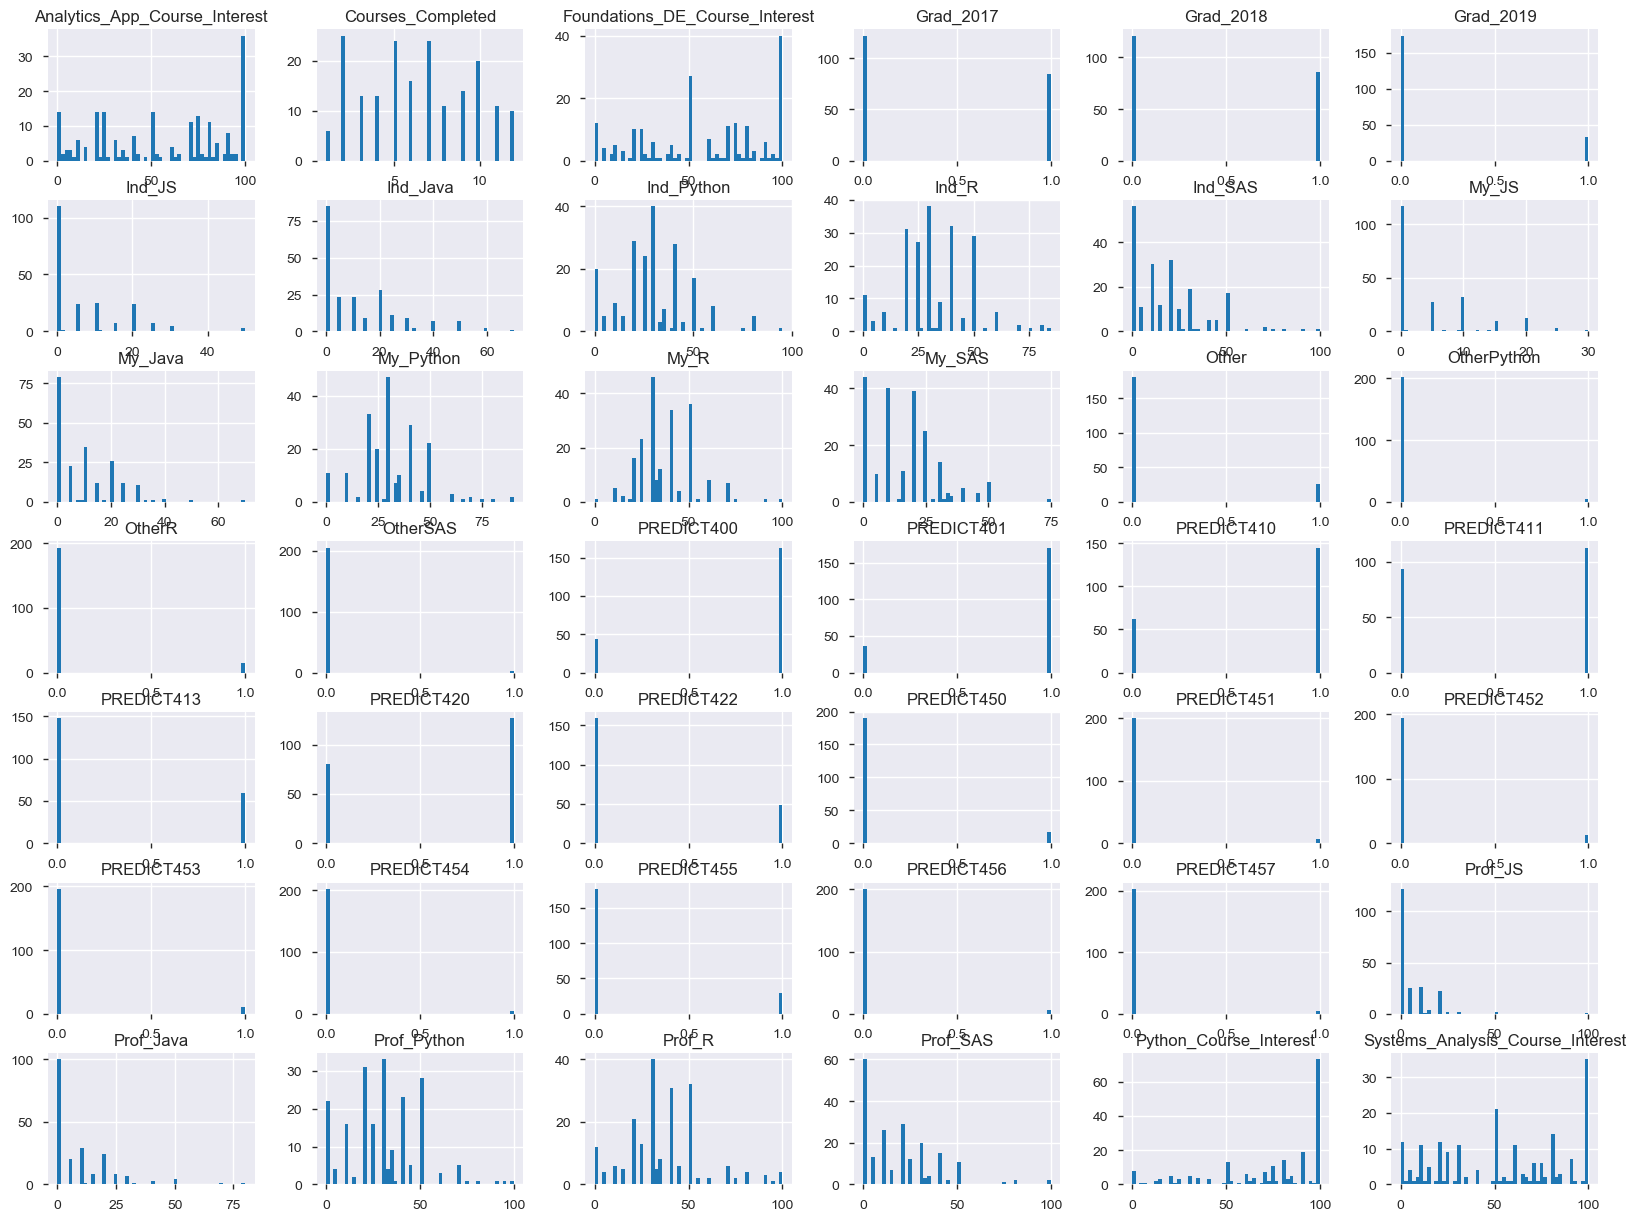

In [97]:
#which feature needs to be transformed? Scaling off? Different magnitude? 
#create histogram plot for all variables to identify skewed variables or different scales
survey_df.hist(bins=50, figsize=(20,15))
plt.savefig(file_title + '.pdf', 
                bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
                orientation='portrait', papertype=None, format=None, 
                transparent=True, pad_inches=0.25, frameon=None)

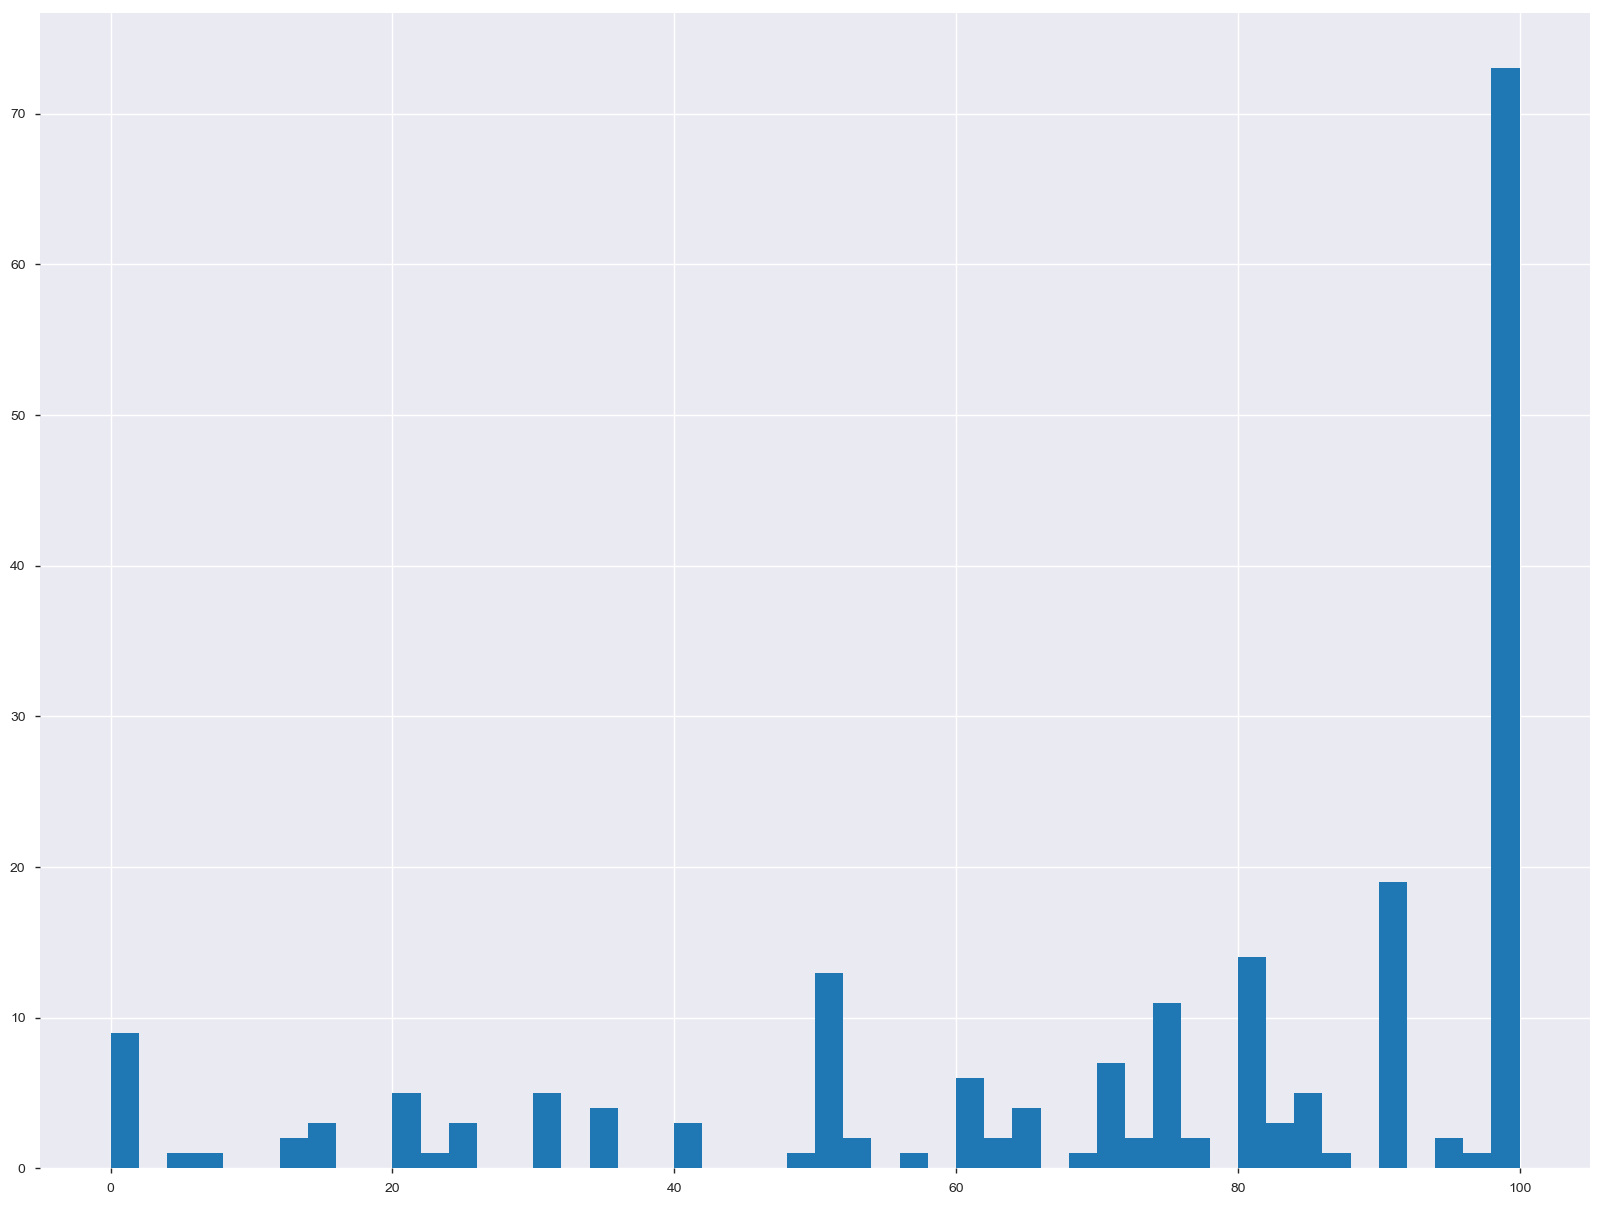

In [98]:
#lets try Python Course Interest
#Histogram of it first
survey['Python_Course_Interest'].hist(bins=50, figsize=(20,15))
plt.savefig(file_title + '.pdf', 
                bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
                orientation='portrait', papertype=None, format=None, 
                transparent=True, pad_inches=0.25, frameon=None)

In [56]:
#Extremely skewd, so log transformation
survey['l_Python_Course_Interest']=np.log(survey['Python_Course_Interest']+1)

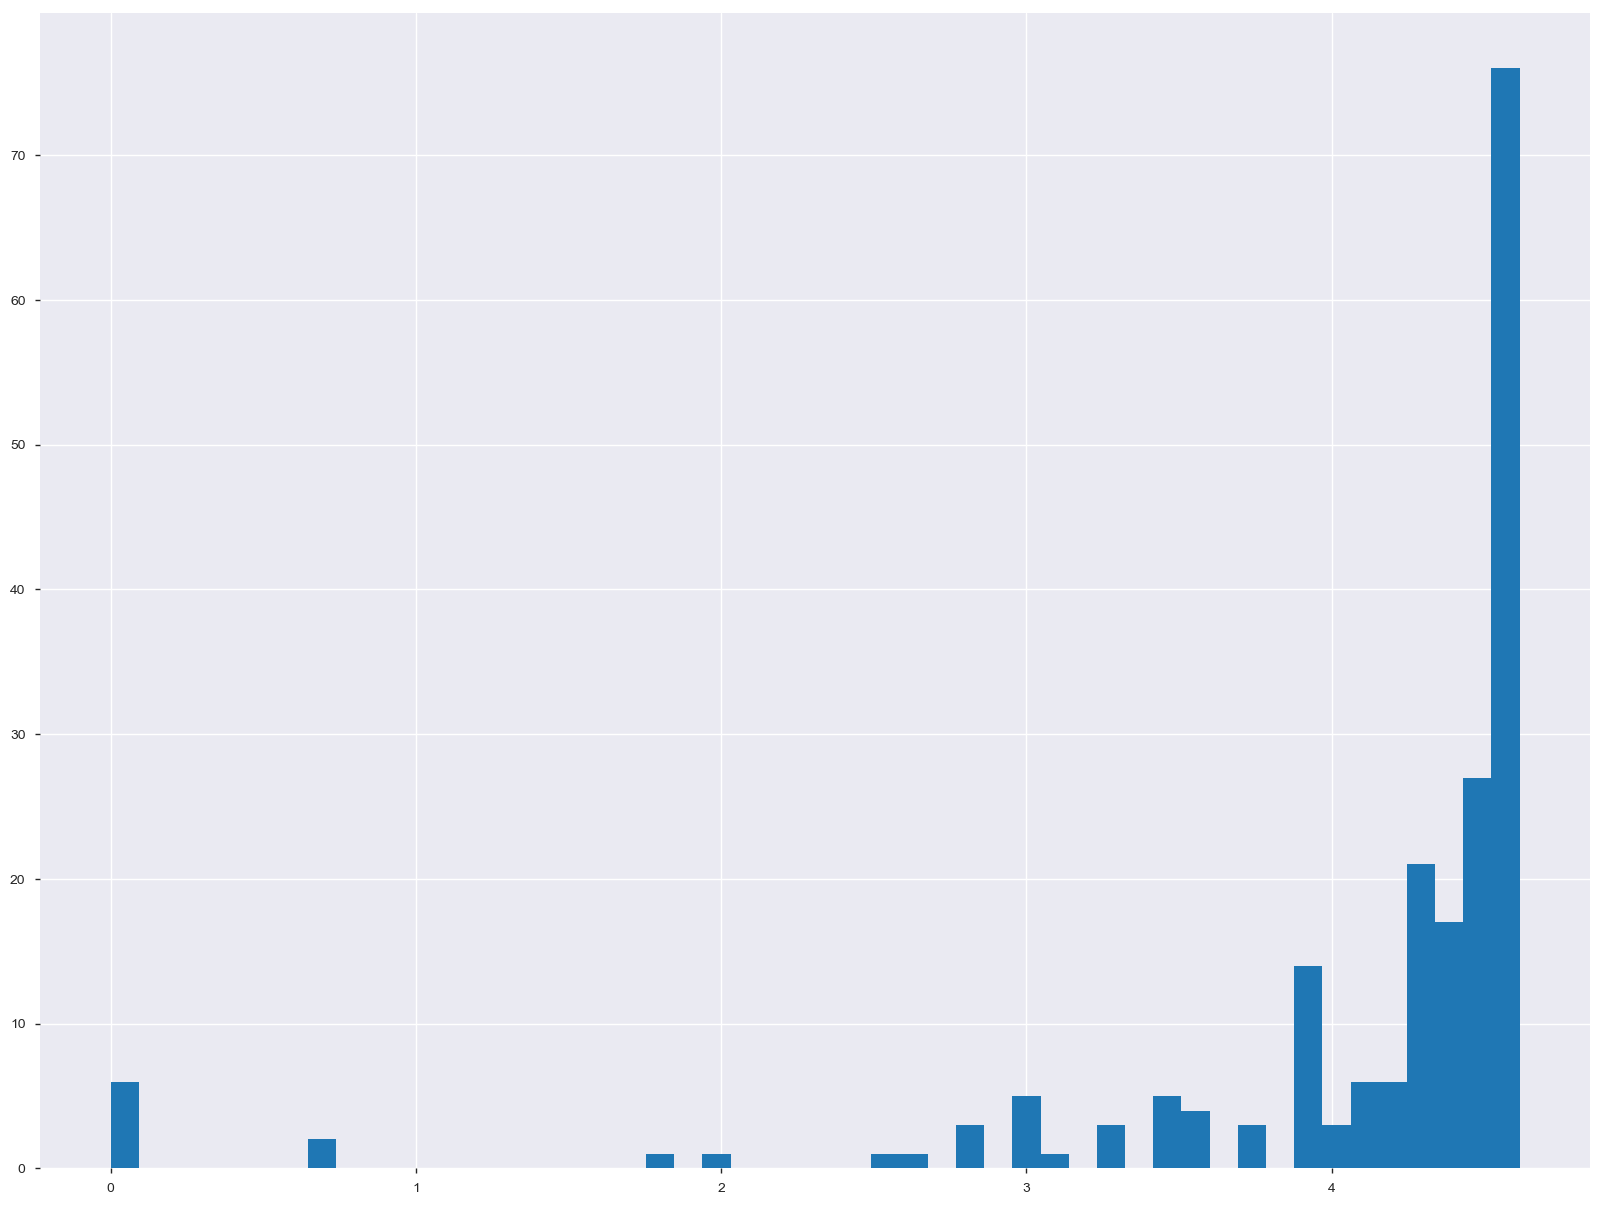

In [99]:
#view histogram of log Python Interest
survey['l_Python_Course_Interest'].hist(bins=50, figsize=(20,15))
plt.savefig(file_title + '.pdf', 
                bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
                orientation='portrait', papertype=None, format=None, 
                transparent=True, pad_inches=0.25, frameon=None)

In [79]:
#fill nan values in dataset prior to scikit learn transformations
survey['Python_Course_Interest']=survey['Python_Course_Interest'].fillna(0)

In [80]:
#create numpy array so that scikit learn transformations will work
re_Python_Interest=np.array(survey['Python_Course_Interest'], dtype=pd.Series)

In [81]:
#reshape numpy array 
re_Python_Interest=re_Python_Interest.reshape(-1,1)

In [83]:
#import Normalizer and transform Python interest
from sklearn.preprocessing import Normalizer
survey['n_Python_Course_Interest']=Normalizer().fit_transform(re_Python_Interest)

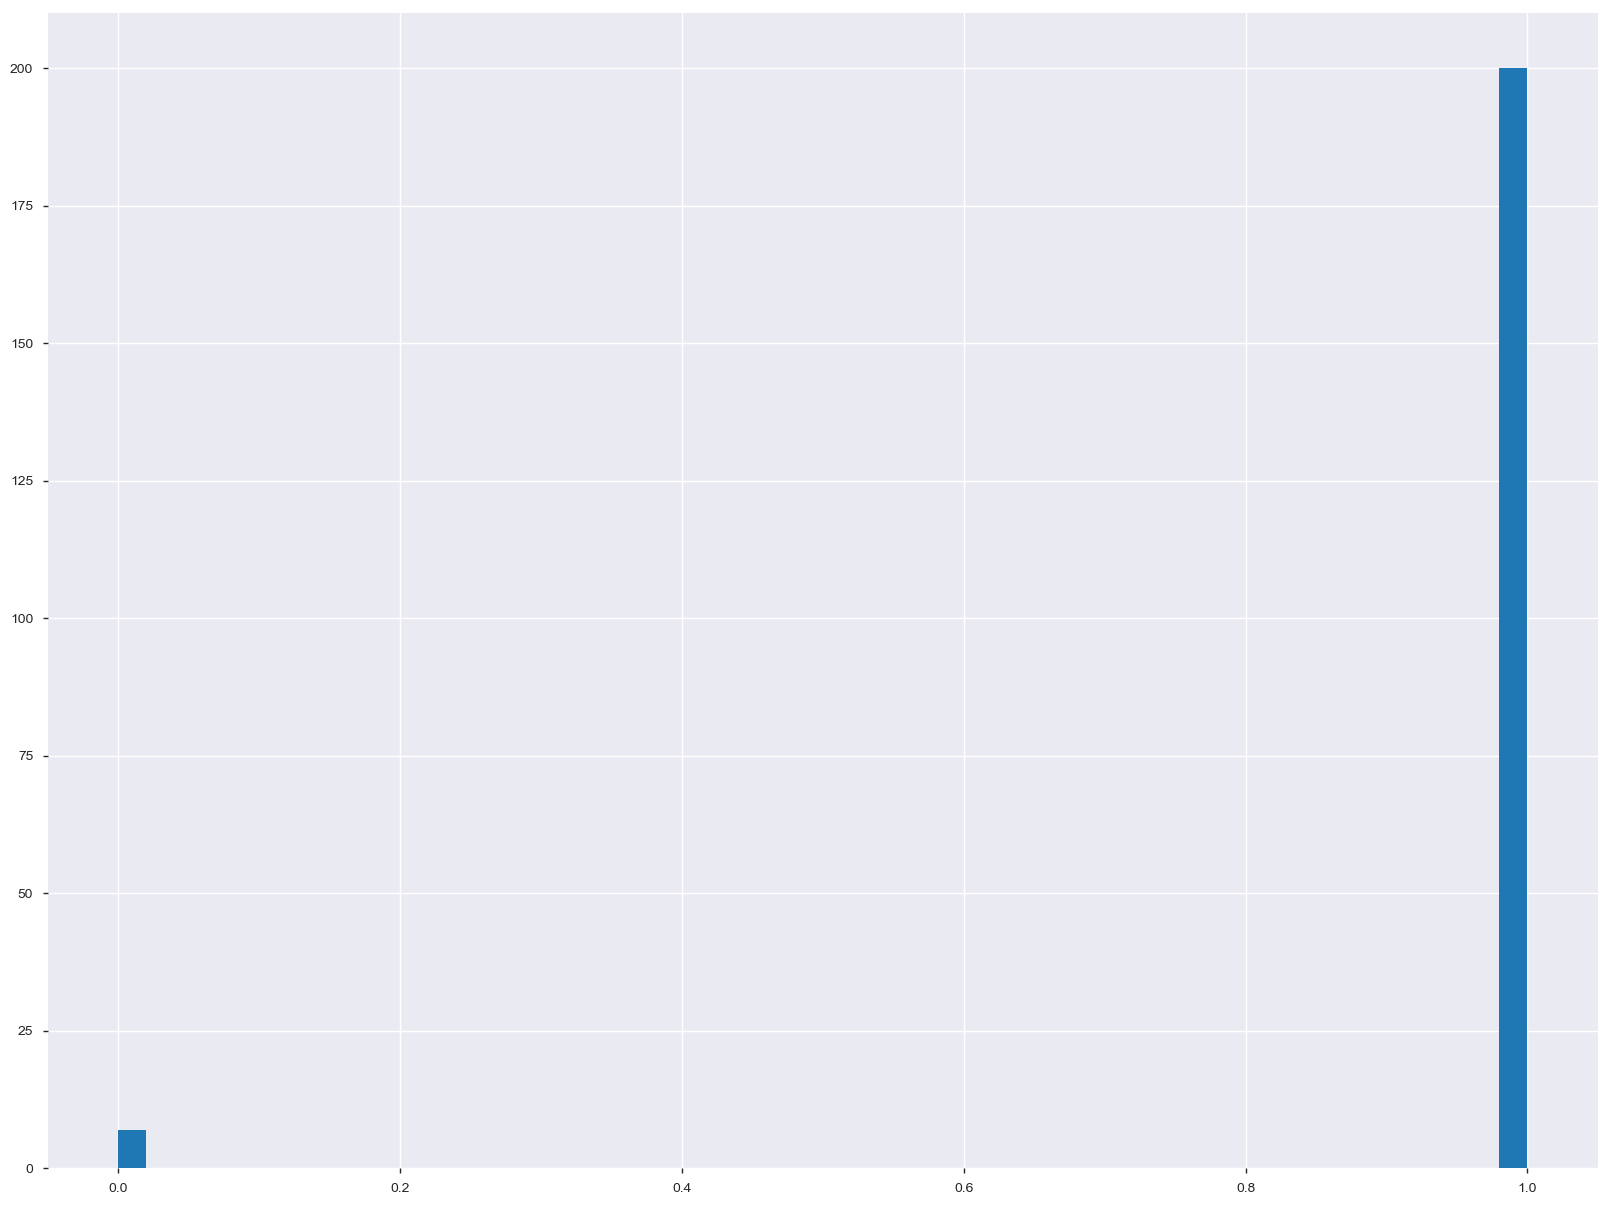

In [100]:
#histogram of normalized Python interest
survey['n_Python_Course_Interest'].hist(bins=50, figsize=(20,15))
plt.savefig(file_title + '.pdf', 
                bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
                orientation='portrait', papertype=None, format=None, 
                transparent=True, pad_inches=0.25, frameon=None)

In [86]:
#import minmaxscaler transformation and transform Python interest array
from sklearn.preprocessing import MinMaxScaler

survey['m_Python_Course_Interest']=MinMaxScaler().fit_transform(re_Python_Interest)

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


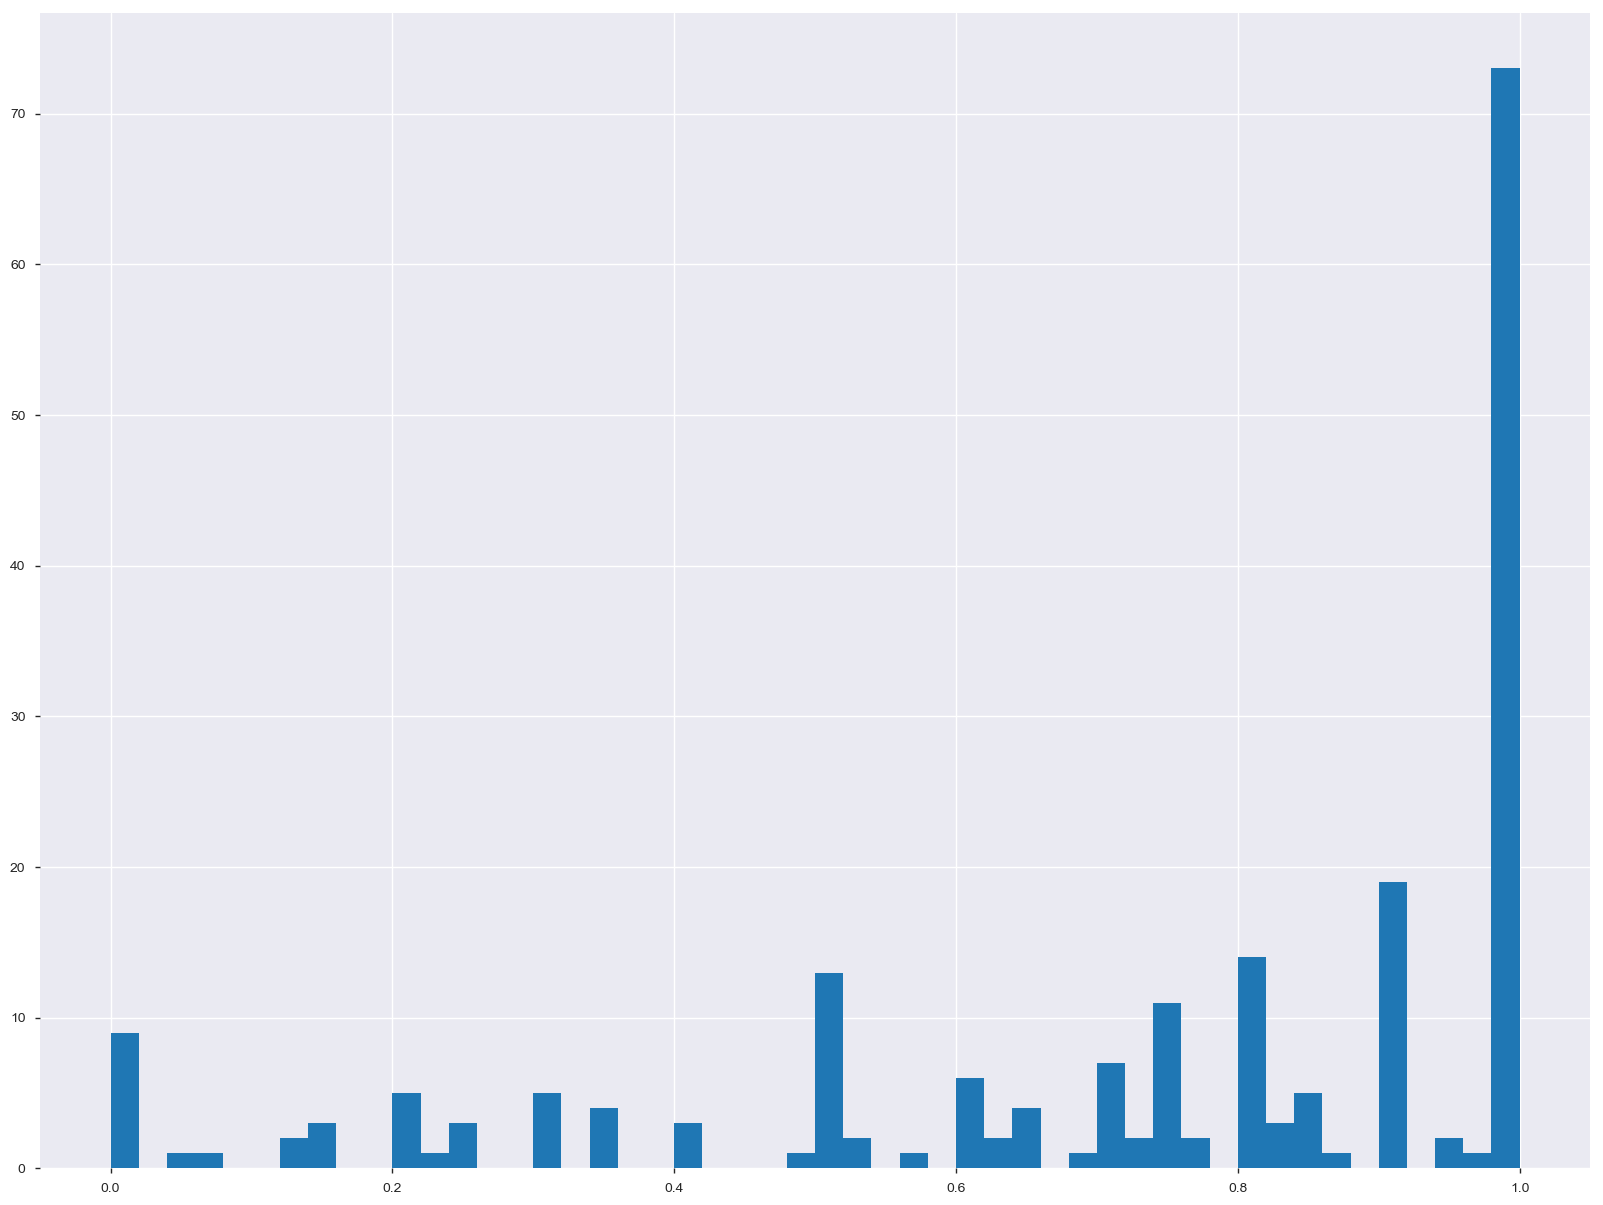

In [101]:
#view histogram of minmax scaled python interest variable
survey['m_Python_Course_Interest'].hist(bins=50, figsize=(20,15))
plt.savefig(file_title + '.pdf', 
                bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
                orientation='portrait', papertype=None, format=None, 
                transparent=True, pad_inches=0.25, frameon=None)

In [88]:
#import robust scaler and transform Python Interest
from sklearn.preprocessing import RobustScaler

survey['r_Python_Course_Interest']=RobustScaler().fit_transform(re_Python_Interest)

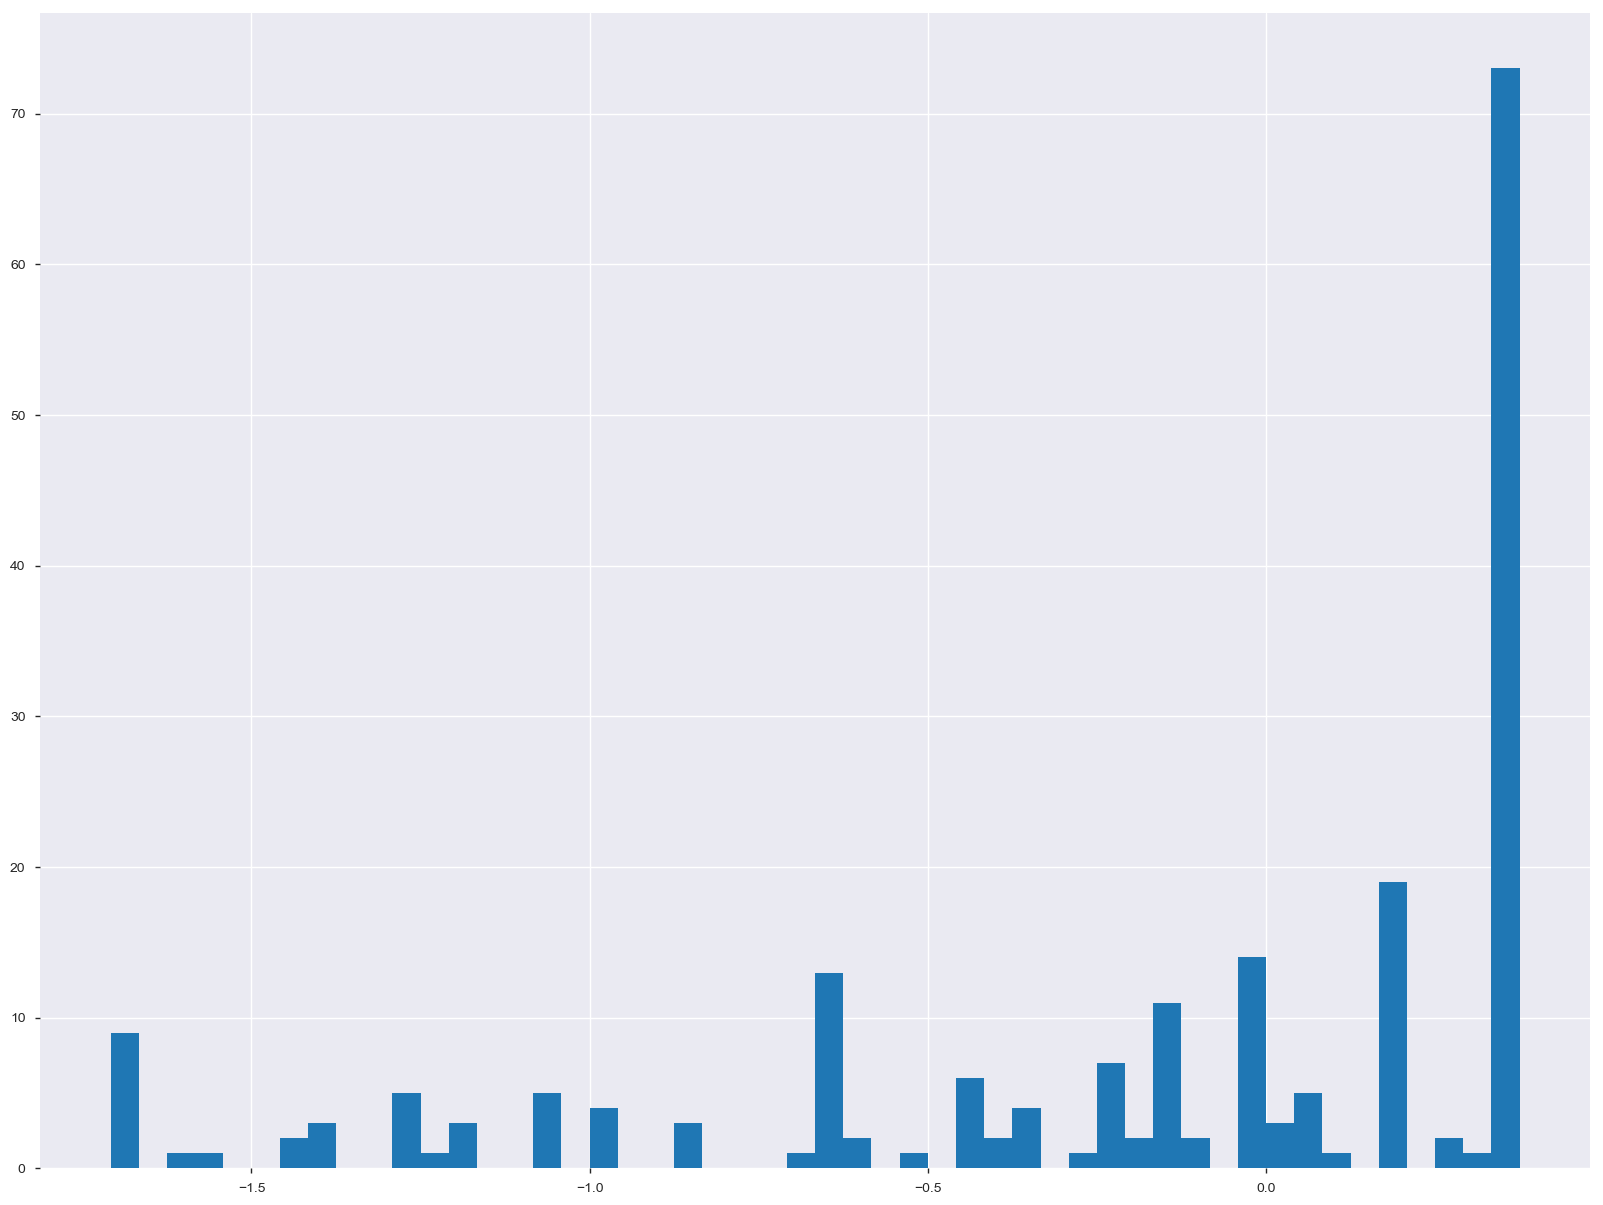

In [102]:
#view histogram of robust scaled python course interest variable
survey['r_Python_Course_Interest'].hist(bins=50, figsize=(20,15))
plt.savefig(file_title + '.pdf', 
                bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
                orientation='portrait', papertype=None, format=None, 
                transparent=True, pad_inches=0.25, frameon=None)